<a href="https://colab.research.google.com/github/hoho25/ML-Churn-Prediction/blob/main/Customer%20Churn%20Data%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Churn Data Prediction**
**Dataset:** [Customer Churn Prediction](https://inclass.kaggle.com/c/customer-churn-prediction/data)

**Goal/ Target:** Predict whether customer about to churn or not.

**Prepared by: ©️ Ho Yie Don 👩‍✈️💻**

**Github:** [hoho25/ML-Churn-Prediction](https://github.com/hoho25/ML-Churn-Prediction)

For further enquiries, please reach out to me through [LinkedIn](https://www.linkedin.com/in/yiedonho/)

You may fill up the [feedback form](https://forms.gle/4gnRvjkjaiw7KG1d9) if you have any comment or found any bug. Your response is greatly appreciated! 😊

---

### **CONTENT :**

**Part 1: Import Libraries**\
**Part 2: Import Data & Check out Data**\
**Part 3: EDA: Data Preprocessing**
  * Missing Values
  * Data Visualization (Seaborn)
  * Feature Engineering
  * Data Correlation 

**Part 4: Fit and Test Models**
  * Build a model
  * Train Test Split

**Part 5: Standardize the Variables**\
**Part 6: Different Types of Models**
  * KNN
  * Logistic Regression
  * SVM
  * Gaussian Naive Bayes
  * Decision Tree | Random Forest

**Part 7: Improvement - Remove the Outliers & Reevaluation**
  * Remove Outliers
  * Compare model result before & after removing ouliers

**Part 8: Conclusion**\
**Extra: Data Visualization (Sweetviz)**
**Extra: Dtale**


**Notes :**\
Part 6 includes longer details for each model.\
May refer to Part 7 for a complete model evaluation.

---
### **Features Definition :**

1. st - state
2. acclen - account length
3. arcode - area code
4. phnum - phone number
5. intplan - internet plan (yes/no)
6. voice - voice
7. nummailmes - no of email messages
8. tdmin - total day messages
9. tdcal - total day time calls
10. tdchar - total day time charges
11. temin - total evening time minutes
12. tecal - total evening time calls
13. tecahr - total evening time charges
14. tnmin - total night time minutes
15. tn cal - total night time calls
16. tnchar - total night time charges
17. timin - total international minutes
18. tical - total international calls
19. tichar - total international charges
20. ncsc - no. of customer services calls
21. label - Churned? (True/False)

____
## **Part 1: Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

____
## **Part 2: Import Data & Check out Data**

In [ ]:
# Load the training dataset
# Drop useless variable/ features (phnum)

df = pd.read_table('churn.txt', index_col = False, sep = ',', skipinitialspace = True)

df.drop('phnum', axis = 1, inplace = True)
df.head()

st  acclen  arcode intplan voice  ...  timin  tical  tichar  ncsc   label
0  KS     128     415      no   yes  ...   10.0      3    2.70     1  False.
1  OH     107     415      no   yes  ...   13.7      3    3.70     1  False.
2  NJ     137     415      no    no  ...   12.2      5    3.29     0  False.
3  OH      84     408     yes    no  ...    6.6      7    1.78     2  False.
4  OK      75     415     yes    no  ...   10.1      3    2.73     3  False.

[5 rows x 20 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st          3333 non-null   object 
 1   acclen      3333 non-null   int64  
 2   arcode      3333 non-null   int64  
 3   intplan     3333 non-null   object 
 4   voice       3333 non-null   object 
 5   nummailmes  3333 non-null   int64  
 6   tdmin       3333 non-null   float64
 7   tdcal       3333 non-null   int64  
 8   tdchar      3333 non-null   float64
 9   temin       3333 non-null   float64
 10  tecal       3333 non-null   int64  
 11  tecahr      3333 non-null   float64
 12  tnmin       3333 non-null   float64
 13  tn cal      3333 non-null   int64  
 14  tnchar      3333 non-null   float64
 15  timin       3333 non-null   float64
 16  tical       3333 non-null   int64  
 17  tichar      3333 non-null   float64
 18  ncsc        3333 non-null   int64  
 19  label       3333 non-null  

In [ ]:
# Check the description of Numerical Features
df.describe().T

count        mean        std  ...     50%     75%     max
acclen      3333.0  101.064806  39.822106  ...  101.00  127.00  243.00
arcode      3333.0  437.182418  42.371290  ...  415.00  510.00  510.00
nummailmes  3333.0    8.099010  13.688365  ...    0.00   20.00   51.00
tdmin       3333.0  179.775098  54.467389  ...  179.40  216.40  350.80
tdcal       3333.0  100.435644  20.069084  ...  101.00  114.00  165.00
tdchar      3333.0   30.562307   9.259435  ...   30.50   36.79   59.64
temin       3333.0  200.980348  50.713844  ...  201.40  235.30  363.70
tecal       3333.0  100.114311  19.922625  ...  100.00  114.00  170.00
tecahr      3333.0   17.083540   4.310668  ...   17.12   20.00   30.91
tnmin       3333.0  200.872037  50.573847  ...  201.20  235.30  395.00
tn cal      3333.0  100.107711  19.568609  ...  100.00  113.00  175.00
tnchar      3333.0    9.039325   2.275873  ...    9.05   10.59   17.77
timin       3333.0   10.237294   2.791840  ...   10.30   12.10   20.00
tical       3333.0    4.479448   2.461214  ...    4.00    6.00   20.00
tichar      3333.0    2.764581   0.753773  ...    2.78    3.27    5.40
ncsc        3333.0    1.562856   1.315491  ...    1.00    2.00    9.00

[16 rows x 8 columns]

In [ ]:
# Check the description of Categorical Features
df.describe(include = ["O"]).T

count unique     top  freq
st       3333     51      WV   106
intplan  3333      2      no  3010
voice    3333      2      no  2411
label    3333      2  False.  2850

In [ ]:
# Check the ratio of label with each features 
df.groupby("label").describe()

acclen                                   ... ncsc                    
         count        mean       std  min   25%  ...  min  25%  50%  75%  max
label                                            ...                         
False.  2850.0  100.793684  39.88235  1.0  73.0  ...  0.0  1.0  1.0  2.0  8.0
True.    483.0  102.664596  39.46782  1.0  76.0  ...  0.0  1.0  2.0  4.0  9.0

[2 rows x 128 columns]

---
## **Part 3: EDA: Data Preprocessing** 

### **1. Check for Missing Values**

In [ ]:
# No missing value
df.isna().sum()

st            0
acclen        0
arcode        0
intplan       0
voice         0
nummailmes    0
tdmin         0
tdcal         0
tdchar        0
temin         0
tecal         0
tecahr        0
tnmin         0
tn cal        0
tnchar        0
timin         0
tical         0
tichar        0
ncsc          0
label         0
dtype: int64

In [ ]:
print(df.isnull().any().all())  #> False

False


____

### **2. Data Visualization (Seaborn)**

In [ ]:
df.columns

Index(['st', 'acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin',
       'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tn cal',
       'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'label'],
      dtype='object')

___
#### **Check the ratio of actual labels (y) for classification problem**
The data is imbalance. (Less Churn Data compared to Loyal Data)\
It might mislead us to have high accuracy. 


In [ ]:
df["label"].value_counts()

False.    2850
True.      483
Name: label, dtype: int64

In [ ]:
print(f"Loyal Rate: {round(2850/(2850+483) * 100, 2)}%")
print(f"Churn Rate: {round( 483/(2850+483) * 100, 2)}%")

Loyal Rate: 85.51%
Churn Rate: 14.49%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


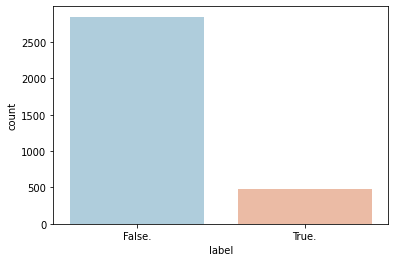

In [ ]:
sns.countplot(df["label"], palette = 'RdBu_r')

___
#### **Check the relationship between number customer service calls (ncsc) & label**

In [ ]:
df[["ncsc", "label"]].groupby("label").describe()

ncsc                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
False.  2850.0  1.449825  1.163883  0.0  1.0  1.0  2.0  8.0
True.    483.0  2.229814  1.853275  0.0  1.0  2.0  4.0  9.0

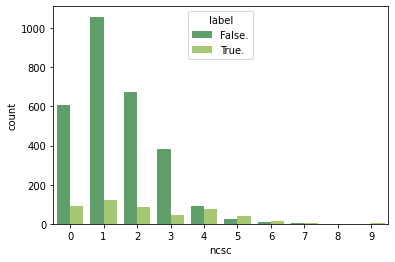

In [ ]:
# When number customer service calls (ncsc) > 4 times, customers tend to churn 
sns.countplot(x = 'ncsc', hue = 'label', data = df, palette = 'summer')

___
#### **Check the relationship between total day minutes (tdmin) & label**

In [ ]:
df[["tdmin", "label"]].groupby("label").describe()

tdmin                                                           
         count        mean        std  min      25%    50%     75%    max
label                                                                    
False.  2850.0  175.175754  50.181655  0.0  142.825  177.2  210.30  315.6
True.    483.0  206.914079  68.997792  0.0  153.250  217.6  265.95  350.8

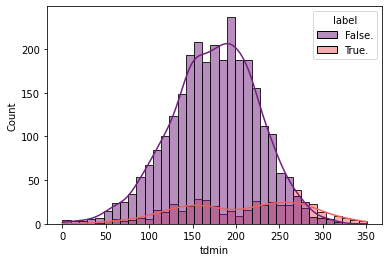

In [ ]:
# When total day minutes (tdmin) >= 270 mins, customers tend to churn 
sns.histplot(x = 'tdmin', hue = 'label', data = df, kde = True, palette = 'magma')

___
#### **Check the relationship between states (st) & label**

In [ ]:
df[["st", "label"]].groupby("label").describe()

st                
       count unique top freq
label                       
False.  2850     51  WV   96
True.    483     51  NJ   18

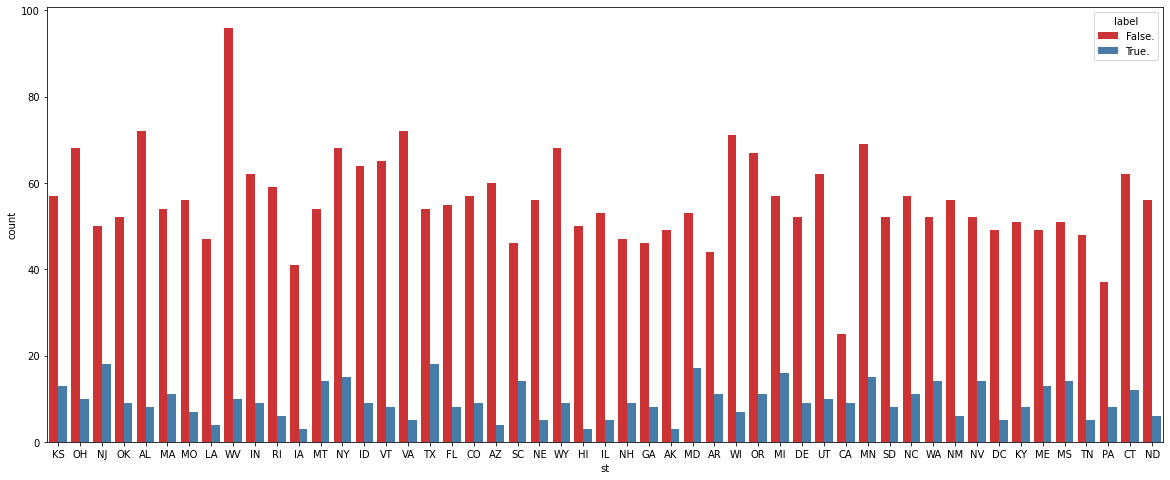

In [ ]:
# Most of the churners are from 'NJ', 'TX' & 'MD' (May advertise more on these place)
# Most of the customers from 'WV' are Loyal

plt.figure(figsize = (20,8))
sns.countplot(x = 'st', hue = 'label', data = df, palette = 'Set1')

______
#### **Check the relationship btw each feature group by label(y)**
**Check the correlation btw each feature**

In [ ]:
sns.pairplot(data = df, hue = "label", palette = "rainbow")

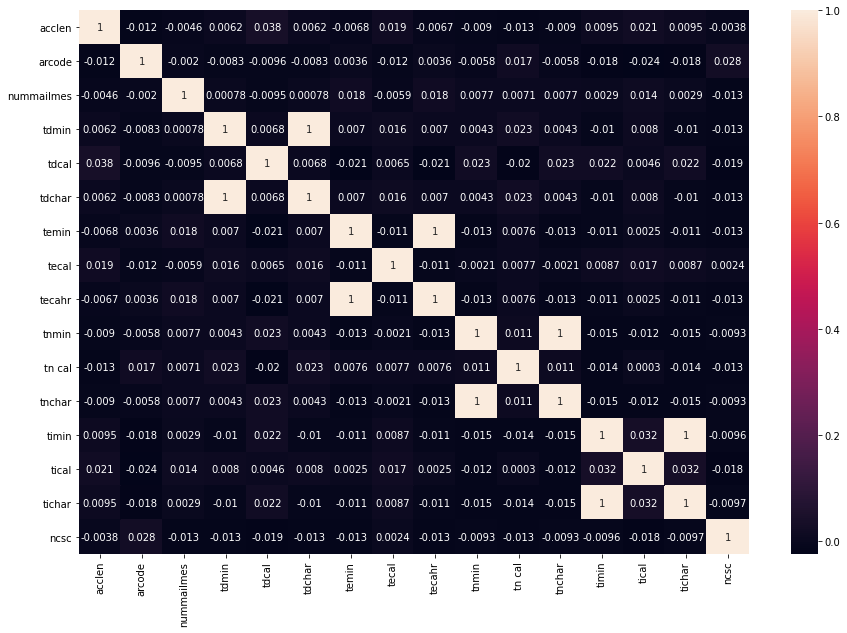

In [ ]:
# Consider of keeping either one of the following features since the correlation is 1 (similar features)
# We will take the minutes instead of charge (Either one will do)
# 1. Total day charge   (tdchar) / Total day minutes   (tdmin)  
# 2. Total eve charge   (tecahr) / Total eve minutes   (temin)   # (tecahr) should be mispelled from techar
# 3. Total night charge (tnchar) / Total night minutes (tnmin)
# 4. Total intl charge  (tichar) / Total intl minutes  (timin)

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

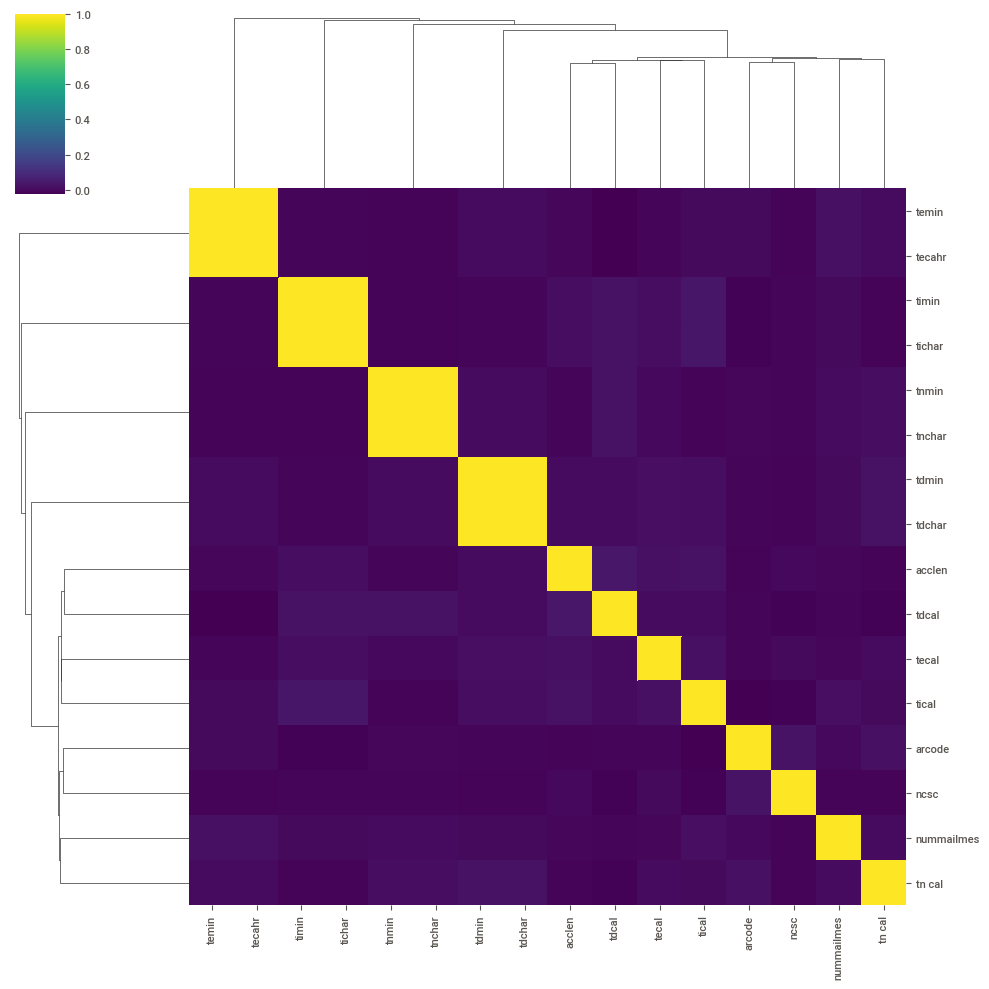

In [ ]:
sns.clustermap(data = df.corr(), cmap = "viridis")

**Select either one of the features that have same correlation (Remove another one)**

In [ ]:
df.head(3)

st  acclen  arcode intplan voice  ...  timin  tical  tichar  ncsc   label
0  KS     128     415      no   yes  ...   10.0      3    2.70     1  False.
1  OH     107     415      no   yes  ...   13.7      3    3.70     1  False.
2  NJ     137     415      no    no  ...   12.2      5    3.29     0  False.

[3 rows x 20 columns]

In [ ]:
df.drop(["tdchar", "tecahr", "tnchar", "tichar"], axis = 1, inplace = True)
df.head(3)

st  acclen  arcode intplan voice  ...  tn cal  timin  tical  ncsc   label
0  KS     128     415      no   yes  ...      91   10.0      3     1  False.
1  OH     107     415      no   yes  ...     103   13.7      3     1  False.
2  NJ     137     415      no    no  ...     104   12.2      5     0  False.

[3 rows x 16 columns]

____

### **3. Feature Engineering**
Bcz library sklearn in Python doesn't help to encode for X feature, only for One Hot/ Label Encoding.

In [ ]:
# Check for all the categorical variables
df.describe(include = ["O"])

st intplan voice   label
count   3333    3333  3333    3333
unique    51       2     2       2
top       WV      no    no  False.
freq     106    3010  2411    2850

#### **I. Label Encoding (Not Ordinal)**
**Replace** the categorical value with a **numeric value between 0 and the number of classes minus 1.**\
Eg: If the categorical variable value contains **5 distinct classes,** we use **(0, 1, 2, 3, and 4).**

** Bcz feature `state` have 51 unique label, **one-hot encoding** is **only applicable** for categorical data that have a **low number of unique values.**

In [ ]:
print(df["st"].nunique())  #> 51
df["st"].unique()

51


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

**Method 1: sklearn.preprocessing.LabelEncoder()**

** (Dtype of OneHotEncoded variables: **int64**)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# df["st"] = LabelEncoder().fit_transform(df["st"])
# df["st"]

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: st, Length: 3333, dtype: int64

____
**Method 2: Category Codes**

** (Dtype of OneHotEncoded variables: **int8**)

In [ ]:
# print("Original st dtype:", df["st"].dtype, "\n")
# df["st"].astype("category")

Original st dtype: object 



0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: st, Length: 3333, dtype: category
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [ ]:
# df["st"] = df["st"].astype("category")
# df["st"] = df["st"].cat.codes
# df["st"]

0       16
1       35
2       31
3       35
4       36
        ..
3328     3
3329    49
3330    39
3331     6
3332    42
Name: st, Length: 3333, dtype: int8

----------

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st          3333 non-null   int64  
 1   acclen      3333 non-null   int64  
 2   arcode      3333 non-null   int64  
 3   intplan     3333 non-null   object 
 4   voice       3333 non-null   object 
 5   nummailmes  3333 non-null   int64  
 6   tdmin       3333 non-null   float64
 7   tdcal       3333 non-null   int64  
 8   tdchar      3333 non-null   float64
 9   temin       3333 non-null   float64
 10  tecal       3333 non-null   int64  
 11  tecahr      3333 non-null   float64
 12  tnmin       3333 non-null   float64
 13  tn cal      3333 non-null   int64  
 14  tnchar      3333 non-null   float64
 15  timin       3333 non-null   float64
 16  tical       3333 non-null   int64  
 17  tichar      3333 non-null   float64
 18  ncsc        3333 non-null   int64  
 19  label       3333 non-null  

In [ ]:
# df["st"].unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28])

In [ ]:
# df.head()

st  acclen  arcode intplan voice  ...  tn cal  timin  tical  ncsc   label
0  16     128     415      no   yes  ...      91   10.0      3     1  False.
1  35     107     415      no   yes  ...     103   13.7      3     1  False.
2  31     137     415      no    no  ...     104   12.2      5     0  False.
3  35      84     408     yes    no  ...      89    6.6      7     2  False.
4  36      75     415     yes    no  ...     121   10.1      3     3  False.

[5 rows x 16 columns]

#### **II. One Hot Encoding**
**Convert Categorical Features to Dummy/ Numerical Variables**

Create a **new column** (sometimes called a **dummy variable**) with **binary encoding (0 or 1)** for each category of a feature to denote whether a particular row belongs to this category. 

** Apply **One Hot Encoding** for features `intplan` & `voice`

**Method 1: sklearn.preprocessing.OneHotEncoder()**

** (Dtype of OneHotEncoded variables: **float64**)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
# sparse: True [default] / False = Will return sparse matrix if set True else will return an array.

encoder = OneHotEncoder(sparse = False, handle_unknown = "error", drop = "first")

In [ ]:
# df[["intplan", "voice"]] = pd.DataFrame(data = encoder.fit_transform(df[["intplan", "voice"]]), columns = [["intplan", "voice"]])
# df.head()

st  acclen  arcode  intplan  voice  ...  tn cal  timin  tical  ncsc   label
0  16     128     415      0.0    1.0  ...      91   10.0      3     1  False.
1  35     107     415      0.0    1.0  ...     103   13.7      3     1  False.
2  31     137     415      0.0    0.0  ...     104   12.2      5     0  False.
3  35      84     408      1.0    0.0  ...      89    6.6      7     2  False.
4  36      75     415      1.0    0.0  ...     121   10.1      3     3  False.

[5 rows x 16 columns]

In [ ]:
# df[["intplan", "voice"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   intplan  3333 non-null   float64
 1   voice    3333 non-null   float64
dtypes: float64(2)
memory usage: 52.2 KB


In [ ]:
# df["intplan"].unique()

array([0., 1.])

___
**Method 2: pd.get_dummies()**

** (Dtype of dummy variables: **uint8**)

In [ ]:
# df[["intplan",	"voice"]] = pd.get_dummies(data = df[["intplan",	"voice"]], drop_first = True)
# df.head()

st  acclen  arcode  intplan  voice  ...  tn cal  timin  tical  ncsc   label
0  16     128     415        0      1  ...      91   10.0      3     1  False.
1  35     107     415        0      1  ...     103   13.7      3     1  False.
2  31     137     415        0      0  ...     104   12.2      5     0  False.
3  35      84     408        1      0  ...      89    6.6      7     2  False.
4  36      75     415        1      0  ...     121   10.1      3     3  False.

[5 rows x 16 columns]

In [ ]:
# df[["intplan", "voice"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   intplan  3333 non-null   uint8
 1   voice    3333 non-null   uint8
dtypes: uint8(2)
memory usage: 6.6 KB


In [ ]:
# df["intplan"].unique()

array([0, 1], dtype=uint8)

#### **III. Change to Numerical/ Binary Label (0, 1)**

Clean the label column to remove the extra dot(.) on each value.

Change to Numerical/ Binary Label (0, 1) 
Eg: `"False." -> 0`  &   `"True." -> 1`

In [ ]:
df["label"].unique()

array(['False.', 'True.'], dtype=object)

In [ ]:
# Label "True."  = 1 (Churn)
# Label "False." = 0 (Loyal)

# df["label"] = df["label"].replace({"True.": 1, "False.": 0})  # OR df["label"] = df["label"].map({"True.": 1, "False.": 0}) 

#### **IV. Combination of I + II + III by using LabelEncoder() only:**

Bcz the way of **LabelEncoder()** dealing with with **binary encoding (0 or 1)** is **similar** as **OneHotEncoder() / pd.get_dummies(drop_first = True)**.

So we can combine all in one shot.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

df_objs = df_objs.apply(LabelEncoder().fit_transform)
df = pd.concat([df_nums, df_objs], axis=1)

df.head(3)

acclen  arcode  nummailmes  tdmin  tdcal  ...  ncsc  st  intplan  voice  label
0     128     415          25  265.1    110  ...     1  16        0      1      0
1     107     415          26  161.6    123  ...     1  35        0      1      0
2     137     415           0  243.4    114  ...     0  31        0      0      0

[3 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      3333 non-null   int64  
 1   arcode      3333 non-null   int64  
 2   nummailmes  3333 non-null   int64  
 3   tdmin       3333 non-null   float64
 4   tdcal       3333 non-null   int64  
 5   temin       3333 non-null   float64
 6   tecal       3333 non-null   int64  
 7   tnmin       3333 non-null   float64
 8   tn cal      3333 non-null   int64  
 9   timin       3333 non-null   float64
 10  tical       3333 non-null   int64  
 11  ncsc        3333 non-null   int64  
 12  st          3333 non-null   int64  
 13  intplan     3333 non-null   int64  
 14  voice       3333 non-null   int64  
 15  label       3333 non-null   int64  
dtypes: float64(4), int64(12)
memory usage: 416.8 KB


#### **V. Convert Numerical Column to Categorical Column**
Even though `arcode` is a numerical column, however area code only has 3 unique value, hence we can covert it to categorical column to have a better prediction later. 

In [ ]:
df["arcode"].unique()

array([415, 408, 510])

In [ ]:
df["arcode"] = df["arcode"].apply(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      3333 non-null   int64  
 1   arcode      3333 non-null   object 
 2   nummailmes  3333 non-null   int64  
 3   tdmin       3333 non-null   float64
 4   tdcal       3333 non-null   int64  
 5   temin       3333 non-null   float64
 6   tecal       3333 non-null   int64  
 7   tnmin       3333 non-null   float64
 8   tn cal      3333 non-null   int64  
 9   timin       3333 non-null   float64
 10  tical       3333 non-null   int64  
 11  ncsc        3333 non-null   int64  
 12  st          3333 non-null   int64  
 13  intplan     3333 non-null   int64  
 14  voice       3333 non-null   int64  
 15  label       3333 non-null   int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 416.8+ KB


**The relationship between arcode & label**

In [ ]:
df.groupby(["label", "arcode"]).count()

acclen  nummailmes  tdmin  tdcal  ...  ncsc    st  intplan  voice
label arcode                                    ...                            
0     408        716         716    716    716  ...   716   716      716    716
      415       1419        1419   1419   1419  ...  1419  1419     1419   1419
      510        715         715    715    715  ...   715   715      715    715
1     408        122         122    122    122  ...   122   122      122    122
      415        236         236    236    236  ...   236   236      236    236
      510        125         125    125    125  ...   125   125      125    125

[6 rows x 14 columns]

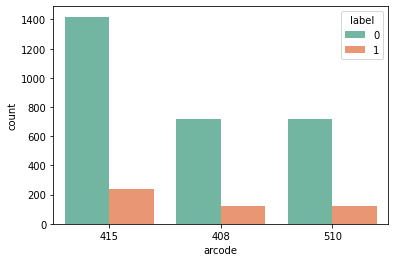

In [ ]:
# The area code that has most of the customers are 415
sns.countplot(x = df["arcode"], hue = df["label"], palette = "Set2")

___
### **4. Check the correlation between the various features and label column**

In [ ]:
df.corr()["label"].sort_values(ascending = False)

label         1.000000
intplan       0.259852
ncsc          0.208750
tdmin         0.205151
temin         0.092796
timin         0.068239
tnmin         0.035493
tdcal         0.018459
acclen        0.016541
tecal         0.009233
st            0.007780
tn cal        0.006141
tical        -0.052844
nummailmes   -0.089728
voice        -0.102148
Name: label, dtype: float64

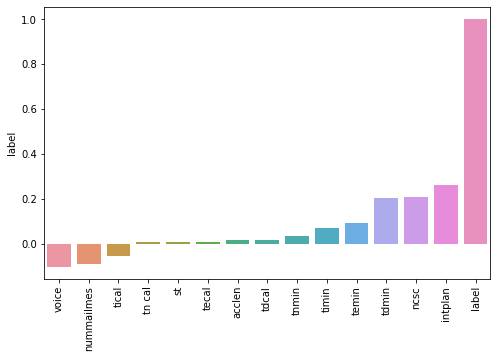

In [ ]:
# df.corr()["label"].sort_values().plot(kind = "bar")

plt.figure(figsize = (8,5))
sns.barplot(x = df.corr()["label"].sort_values().index, 
            y = df.corr()["label"].sort_values())
plt.xticks(rotation = 90);

____
## **Part 4: Fit and Test Models**

### **1. Build a Model**

In [ ]:
df.head(3)

acclen arcode  nummailmes  tdmin  tdcal  ...  ncsc  st  intplan  voice  label
0     128    415          25  265.1    110  ...     1  16        0      1      0
1     107    415          26  161.6    123  ...     1  35        0      1      0
2     137    415           0  243.4    114  ...     0  31        0      0      0

[3 rows x 16 columns]

In [ ]:
# X features (w/o label y)
X = df.drop(["label"], axis = 1)
X.head()

acclen arcode  nummailmes  tdmin  tdcal  ...  tical  ncsc  st  intplan  voice
0     128    415          25  265.1    110  ...      3     1  16        0      1
1     107    415          26  161.6    123  ...      3     1  35        0      1
2     137    415           0  243.4    114  ...      5     0  31        0      0
3      84    408           0  299.4     71  ...      7     2  35        1      0
4      75    415           0  166.7    113  ...      3     3  36        1      0

[5 rows x 15 columns]

In [ ]:
# y Target (Only include label y)
y = df['label']
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: label, Length: 3333, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      3333 non-null   int64  
 1   arcode      3333 non-null   object 
 2   nummailmes  3333 non-null   int64  
 3   tdmin       3333 non-null   float64
 4   tdcal       3333 non-null   int64  
 5   temin       3333 non-null   float64
 6   tecal       3333 non-null   int64  
 7   tnmin       3333 non-null   float64
 8   tn cal      3333 non-null   int64  
 9   timin       3333 non-null   float64
 10  tical       3333 non-null   int64  
 11  ncsc        3333 non-null   int64  
 12  st          3333 non-null   int64  
 13  intplan     3333 non-null   int64  
 14  voice       3333 non-null   int64  
 15  label       3333 non-null   int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 416.8+ KB


____
### **2. Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
X_train.head(3)

acclen arcode  nummailmes  tdmin  tdcal  ...  tical  ncsc  st  intplan  voice
747      155    510           0  184.6    102  ...      1     1  17        0      0
1814      72    415           0  198.4    147  ...      4     0  17        0      0
3251      88    408           0  274.6    105  ...      4     2  35        0      0

[3 rows x 15 columns]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 747 to 863
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      2666 non-null   int64  
 1   arcode      2666 non-null   object 
 2   nummailmes  2666 non-null   int64  
 3   tdmin       2666 non-null   float64
 4   tdcal       2666 non-null   int64  
 5   temin       2666 non-null   float64
 6   tecal       2666 non-null   int64  
 7   tnmin       2666 non-null   float64
 8   tn cal      2666 non-null   int64  
 9   timin       2666 non-null   float64
 10  tical       2666 non-null   int64  
 11  ncsc        2666 non-null   int64  
 12  st          2666 non-null   int64  
 13  intplan     2666 non-null   int64  
 14  voice       2666 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 333.2+ KB


In [ ]:
X_test.head(3)

acclen arcode  nummailmes  tdmin  tdcal  ...  tical  ncsc  st  intplan  voice
3047      88    415           0  172.8     81  ...      5     2   3        0      0
3021      57    415           0   85.9     92  ...      2     0   5        0      0
1671      84    415           0  130.2    105  ...      6     2  45        0      0

[3 rows x 15 columns]

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 3047 to 3033
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      667 non-null    int64  
 1   arcode      667 non-null    object 
 2   nummailmes  667 non-null    int64  
 3   tdmin       667 non-null    float64
 4   tdcal       667 non-null    int64  
 5   temin       667 non-null    float64
 6   tecal       667 non-null    int64  
 7   tnmin       667 non-null    float64
 8   tn cal      667 non-null    int64  
 9   timin       667 non-null    float64
 10  tical       667 non-null    int64  
 11  ncsc        667 non-null    int64  
 12  st          667 non-null    int64  
 13  intplan     667 non-null    int64  
 14  voice       667 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 83.4+ KB


In [ ]:
y_train

747     0
1814    0
3251    0
3147    0
231     0
       ..
599     0
1599    0
1361    0
1547    0
863     0
Name: label, Length: 2666, dtype: int64

In [ ]:
y_test

3047    0
3021    0
1671    0
1612    0
1428    0
       ..
2655    0
1413    0
619     1
1796    0
3033    0
Name: label, Length: 667, dtype: int64

___
## **Part 5: Standardize the Variables**

Standardize features by **removing the mean** and **scaling to unit variance** so that the value have **same initial step/ Configuration.**\
The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the **mean of the training samples** or **zero** if `with_mean=False`, and `s` is the **standard deviation of the training samples** or **one** if `with_std=False`.

**Centering** and **scaling** happen **independently** on **each feature** by **computing** the **relevant statistics** on the samples in the **training set.** Mean and standard deviation are then stored to be used on later data using method `transform`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.34038483,  1.71183369, -0.58383418, ..., -0.61595971,
        -0.32592034, -0.61116185],
       [-0.71707804, -0.52534416, -0.58383418, ..., -0.61595971,
        -0.32592034, -0.61116185],
       [-0.32045869, -0.69018884, -0.58383418, ...,  0.59919649,
        -0.32592034, -0.61116185],
       ...,
       [-0.91538771, -0.52534416, -0.58383418, ...,  1.61182665,
        -0.32592034, -0.61116185],
       [ 1.43953967, -0.52534416, -0.58383418, ...,  1.1392659 ,
        -0.32592034, -0.61116185],
       [-1.38637319, -0.69018884, -0.58383418, ..., -0.14339896,
        -0.32592034, -0.61116185]])

In [ ]:
X_test

array([[-0.32045869, -0.52534416, -0.58383418, ..., -1.56108119,
        -0.32592034, -0.61116185],
       [-1.08890868, -0.52534416, -0.58383418, ..., -1.42606383,
        -0.32592034, -0.61116185],
       [-0.41961353, -0.52534416, -0.58383418, ...,  1.27428326,
        -0.32592034, -0.61116185],
       ...,
       [ 0.22489291, -0.52534416, -0.58383418, ..., -0.68346838,
         3.06823443, -0.61116185],
       [-0.54355707, -0.52534416, -0.58383418, ...,  1.1392659 ,
        -0.32592034, -0.61116185],
       [ 0.84461065,  1.71183369, -0.58383418, ..., -0.61595971,
        -0.32592034, -0.61116185]])

____

# **Part 6: Different Types of Models**

1. KNN
2. Logistic Regression
3. SVM
4. Gaussian Naive Bayes
5. Decision Tree | Random Forest

## **I. KNN**

### **1. Using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### **2. Predictions and Evaluations**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[536  49]
 [ 51  31]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       585
           1       0.39      0.38      0.38        82

    accuracy                           0.85       667
   macro avg       0.65      0.65      0.65       667
weighted avg       0.85      0.85      0.85       667



___
### **3. Choosing best k value**

In [ ]:
error_rate = []

for k in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))
    
print(error_rate)

[0.14992503748125938, 0.10944527736131934, 0.11094452773613193, 0.10794602698650675, 0.09895052473763119, 0.1184407796101949, 0.11394302848575712, 0.11544227886056972, 0.11094452773613193, 0.12143928035982009, 0.11244377811094453, 0.1184407796101949, 0.11544227886056972, 0.11694152923538231, 0.11544227886056972, 0.11544227886056972, 0.11694152923538231, 0.1184407796101949, 0.1199400299850075, 0.1184407796101949, 0.1199400299850075, 0.1199400299850075, 0.12293853073463268, 0.1199400299850075, 0.12143928035982009, 0.12293853073463268, 0.12143928035982009, 0.1199400299850075, 0.12293853073463268, 0.12143928035982009, 0.12143928035982009, 0.1199400299850075, 0.1199400299850075, 0.12143928035982009, 0.12143928035982009, 0.1199400299850075, 0.1199400299850075, 0.12143928035982009, 0.12143928035982009]


In [ ]:
print("K-Value:", np.argmin(error_rate) + 1, "| Min Error Rate:", np.min(error_rate).round(2))
print("K-Value:", np.argmax(error_rate) + 1, "| Max Error Rate:", np.max(error_rate).round(2))

K-Value: 5 | Min Error Rate: 0.1
K-Value: 1 | Max Error Rate: 0.15


Text(0, 0.5, 'Error Rate')

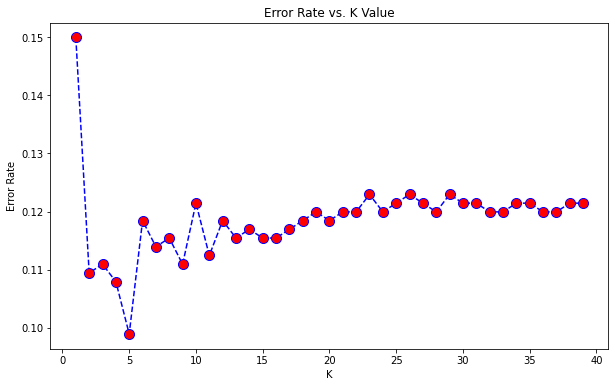

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### **4. Retrain with new K Value**

In [ ]:
# NOW WITH K=5 (Min Error rate)
# Accuracy & Precision increases, but recall decreases a lot
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("WITH K=5 \n")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

WITH K=5 

[[573  12]
 [ 54  28]] 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       585
           1       0.70      0.34      0.46        82

    accuracy                           0.90       667
   macro avg       0.81      0.66      0.70       667
weighted avg       0.89      0.90      0.89       667



___
### **5. GridSearchCV : Search for Best parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = KNeighborsClassifier( )
param_grid = {"n_neighbors" : [1,3,5,7,9,11],
              "weights" : ['uniform', 'distance'],
              "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p" : [1,2]}

grid = GridSearchCV(model, param_grid, 
                    scoring = ["accuracy", "balanced_accuracy", "precision", "recall"],
                    cv = 5, refit = "accuracy", verbose = 1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   21.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False,
             scoring=['accuracy', 'balanced_accuracy', 'precision', 'recall'],
             verbose=1)

In [ ]:
pd.DataFrame(grid.cv_results_).head(3)

mean_fit_time  std_fit_time  ...  std_test_recall  rank_test_recall
0       0.003622      0.000182  ...         0.017183                 9
1       0.003403      0.000182  ...         0.017183                 9
2       0.003849      0.000769  ...         0.052405                 1

[3 rows x 41 columns]

In [ ]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_algorithm', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_balanced_accuracy', 'split1_test_balanced_accuracy', 'split2_test_balanced_accuracy', 'split3_test_balanced_accuracy', 'split4_test_balanced_accuracy', 'mean_test_balanced_accuracy', 'std_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [ ]:
print("mean_test_accuracy         :", grid.cv_results_["mean_test_accuracy"].mean())
print("mean_test_balanced_accuracy:", grid.cv_results_["mean_test_balanced_accuracy"].mean())

print("mean_test_precision        :", grid.cv_results_["mean_test_precision"].mean())
print("mean_test_recall           :", grid.cv_results_["mean_test_recall"].mean())

mean_test_accuracy         : 0.8701728667027379
mean_test_balanced_accuracy: 0.6243343885414112
mean_test_precision        : 0.7167844123681192
mean_test_recall           : 0.27271219135802466


In [ ]:
grid.best_score_

0.8807210967528863

In [ ]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

### **6. Evaluation for best parameters checked from GridSearchCV**

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, grid_pred)

array([[579,   6],
       [ 63,  19]])

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       585
           1       0.76      0.23      0.36        82

    accuracy                           0.90       667
   macro avg       0.83      0.61      0.65       667
weighted avg       0.88      0.90      0.87       667



## **II. Logistic Regression**

### **1. Create & Train Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logmodel.predict(X_test)

### **2. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[560  25]
 [ 65  17]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       585
           1       0.40      0.21      0.27        82

    accuracy                           0.87       667
   macro avg       0.65      0.58      0.60       667
weighted avg       0.84      0.87      0.85       667



#### **Coefficient**

In [ ]:
logmodel.coef_

array([[-0.04730664,  0.01188001,  0.48359808,  0.73051541,  0.13140617,
         0.35170218,  0.04929564,  0.19514026,  0.02486474,  0.25524178,
        -0.19935692,  0.69435348,  0.04551202,  0.62026724, -0.86386517]])

In [ ]:
coef_df = pd.DataFrame(data = logmodel.coef_, columns = X.columns, index = ["Coefficient"]).T.sort_values(["Coefficient"])
coef_df

Coefficient
voice         -0.863865
tical         -0.199357
acclen        -0.047307
arcode         0.011880
tn cal         0.024865
st             0.045512
tecal          0.049296
tdcal          0.131406
tnmin          0.195140
timin          0.255242
temin          0.351702
nummailmes     0.483598
intplan        0.620267
ncsc           0.694353
tdmin          0.730515

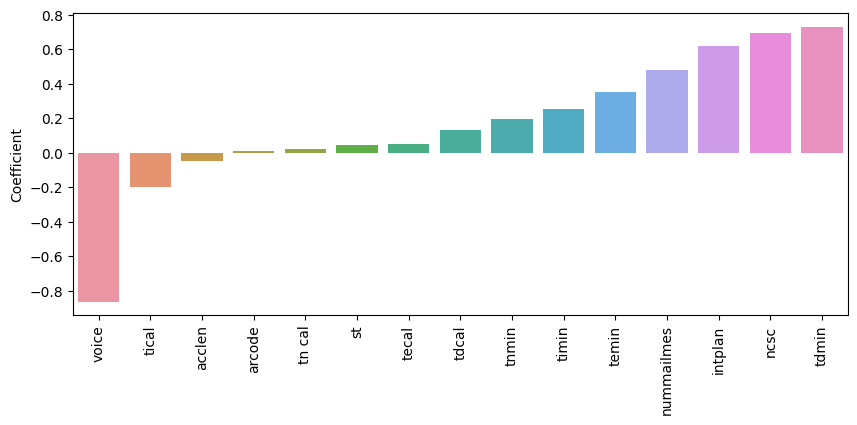

In [ ]:
plt.figure(figsize=(10, 4), dpi = 100)
sns.barplot(x = coef_df.index, y = coef_df["Coefficient"])
plt.xticks(rotation=90);

#### **Predict the probability of each label & Find the accuracy**

In [ ]:
logmodel.predict_proba(X_test)

array([[0.93078085, 0.06921915],
       [0.98331936, 0.01668064],
       [0.82371472, 0.17628528],
       ...,
       [0.28139379, 0.71860621],
       [0.95730839, 0.04269161],
       [0.90548042, 0.09451958]])

In [ ]:
prob_df =  pd.DataFrame(data = logmodel.predict_proba(X_test), columns = ["Loyal Probability", "Churn Probability"])
prob_df.head()

Loyal Probability  Churn Probability
0           0.930781           0.069219
1           0.983319           0.016681
2           0.823715           0.176285
3           0.846022           0.153978
4           0.329260           0.670740

In [ ]:
y_test

3047    0
3021    0
1671    0
1612    0
1428    0
       ..
2655    0
1413    0
619     1
1796    0
3033    0
Name: label, Length: 667, dtype: int64

In [ ]:
prob_df["Predicted Label (y_pred)"] = y_pred
prob_df["Actual Label (y_test)"] = y_test.values

In [ ]:
# 0: y_test != y_pred
# 1: y_test == y_pred

prob_df["Accuracy"] = np.where(prob_df["Predicted Label (y_pred)"] != prob_df["Actual Label (y_test)"], 0, 1).tolist()

In [ ]:
prob_df.head(10)

Loyal Probability  Churn Probability  ...  Predicted Label (y_pred)  Accuracy
0           0.930781           0.069219  ...                         0         1
1           0.983319           0.016681  ...                         0         1
2           0.823715           0.176285  ...                         0         1
3           0.846022           0.153978  ...                         0         1
4           0.329260           0.670740  ...                         1         0
5           0.935021           0.064979  ...                         0         1
6           0.241212           0.758788  ...                         1         1
7           0.980554           0.019446  ...                         0         1
8           0.990016           0.009984  ...                         0         1
9           0.853644           0.146356  ...                         0         0

[10 rows x 5 columns]

In [ ]:
prob_df["Accuracy"].mean()

0.8650674662668666

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8650674662668666

### **3. Evaluating Curves and AUC**

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

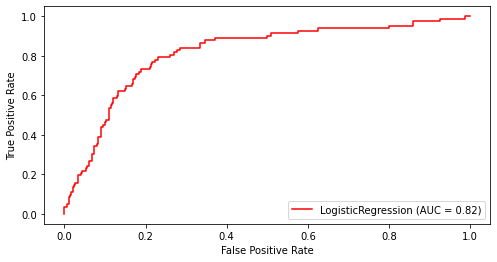

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
plot_roc_curve(logmodel, X_test, y_test, ax = ax, color = "red")

In [ ]:
precision_recall_curve(y_test, y_pred)

(array([0.12293853, 0.4047619 , 1.        ]),
 array([1.        , 0.20731707, 0.        ]),
 array([0, 1]))

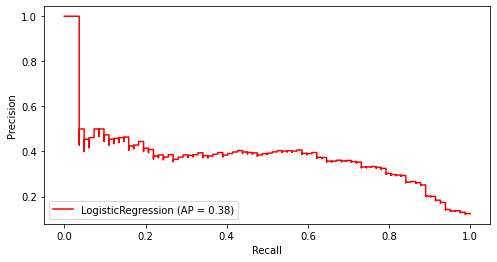

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
plot_precision_recall_curve(logmodel, X_test, y_test, ax = ax, color = "red")

## **III. Support Vector Machine (SVM)**

### **1. Create SVM Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(X_test)

### **2. Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred) 

array([[576,   9],
       [ 45,  37]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       585
           1       0.80      0.45      0.58        82

    accuracy                           0.92       667
   macro avg       0.87      0.72      0.77       667
weighted avg       0.91      0.92      0.91       667



#### **Result for model = SVC(class_weight = "balanced")**

`class_weight` : dict or 'balanced', default=None
 - Set the parameter C of class i to ``class_weight[i]*C`` for SVC. If not given, all classes are supposed to have weight one.
 - The "balanced" mode uses the values of y to automatically **adjust weights inversely proportional to class frequencies** in the input data as ``n_samples / (n_classes * np.bincount(y))``

Since our **churn data ratio is lower** than loyal data, causing **imbalance** dataset **(Accuray & Precision: High, Recall: Low)**
So we try to set the ``class_weight = "balanced"`` in **SVC()** to **increase the recall score.** However this will **cause Accuray & Precision drops.**


In [ ]:
model = SVC(class_weight = "balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred) 

array([[520,  65],
       [ 15,  67]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       585
           1       0.51      0.82      0.63        82

    accuracy                           0.88       667
   macro avg       0.74      0.85      0.78       667
weighted avg       0.91      0.88      0.89       667



### **3. GridSearchCV : Search for Best parameters & Evaluation**

#### **Result for model = SVC()**

In [ ]:
model = SVC()
param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
              "C"      : list(range(1,11)),
              "gamma"  : ['scale', 'auto'],
              "degree" : [1, 2, 3]}

grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)

In [ ]:
grid.best_score_ 

0.9152300243832171

In [ ]:
grid.best_params_

{'C': 5, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
confusion_matrix(y_test, grid_pred)

array([[567,  18],
       [ 29,  53]])

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       585
           1       0.75      0.65      0.69        82

    accuracy                           0.93       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.93      0.93      0.93       667



#### **Result for model = SVC(class_weight = "balanced")**

In [ ]:
model = SVC(class_weight = "balanced")
param_grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
              "C"      : list(range(1,11)),
              "gamma"  : ['scale', 'auto'],
              "degree" : [1, 2, 3]}

grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)

In [ ]:
grid.best_score_ 

0.9002311838157275

In [ ]:
grid.best_params_

{'C': 5, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
confusion_matrix(y_test, grid_pred)

array([[563,  22],
       [ 36,  46]])

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       585
           1       0.57      0.66      0.61        82

    accuracy                           0.90       667
   macro avg       0.76      0.79      0.78       667
weighted avg       0.90      0.90      0.90       667



## **IV. Gaussian Naive Bayes**

Gaussian NB -> Continuous X\
Multinomial NB -> Categorical X

#### **1. Create Gaussian Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(X_test)

#### **2. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[536  49]
 [ 45  37]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       585
           1       0.43      0.45      0.44        82

    accuracy                           0.86       667
   macro avg       0.68      0.68      0.68       667
weighted avg       0.86      0.86      0.86       667



## **V. Decision Tree**

### **1. Decision Tree Classifier & Base/ Default Hyperparameters**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dtree.predict(X_test)

### **2. Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       585
           1       0.68      0.77      0.72        82

    accuracy                           0.93       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.93      0.93      0.93       667



In [ ]:
dtree.score(X_test, y_test)

0.9280359820089955

In [ ]:
confusion_matrix(y_test, y_pred)

array([[556,  29],
       [ 19,  63]])

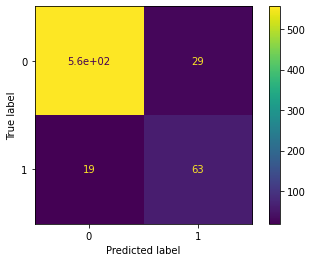

In [ ]:
print(plot_confusion_matrix(dtree, X_test, y_test))

In [ ]:
# print(dtree.feature_importances_)

In [ ]:
pd.DataFrame(data = dtree.feature_importances_, index = X.columns, 
             columns = ["Feature Importances"]).sort_values("Feature Importances", ascending = False)

Feature Importances
tdmin                  0.269516
temin                  0.153819
ncsc                   0.102124
tical                  0.091767
timin                  0.087044
intplan                0.075454
nummailmes             0.070787
tnmin                  0.067628
acclen                 0.021827
tdcal                  0.016533
tn cal                 0.012982
tecal                  0.011730
arcode                 0.009784
st                     0.009005
voice                  0.000000

### **3. Visualize the Tree**

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize = (30, 20), dpi = 350)
plot_tree(dtree, filled = True, feature_names = X.columns);

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [ ]:
def report_model(dtree):
    y_pred = dtree.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('\n')
    plt.figure(figsize=(20,10), dpi=300)
    plot_tree(dtree, filled = True, feature_names = X.columns)

#### **Parameter: Criterion**

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       585
           1       0.72      0.78      0.75        82

    accuracy                           0.94       667
   macro avg       0.84      0.87      0.86       667
weighted avg       0.94      0.94      0.94       667





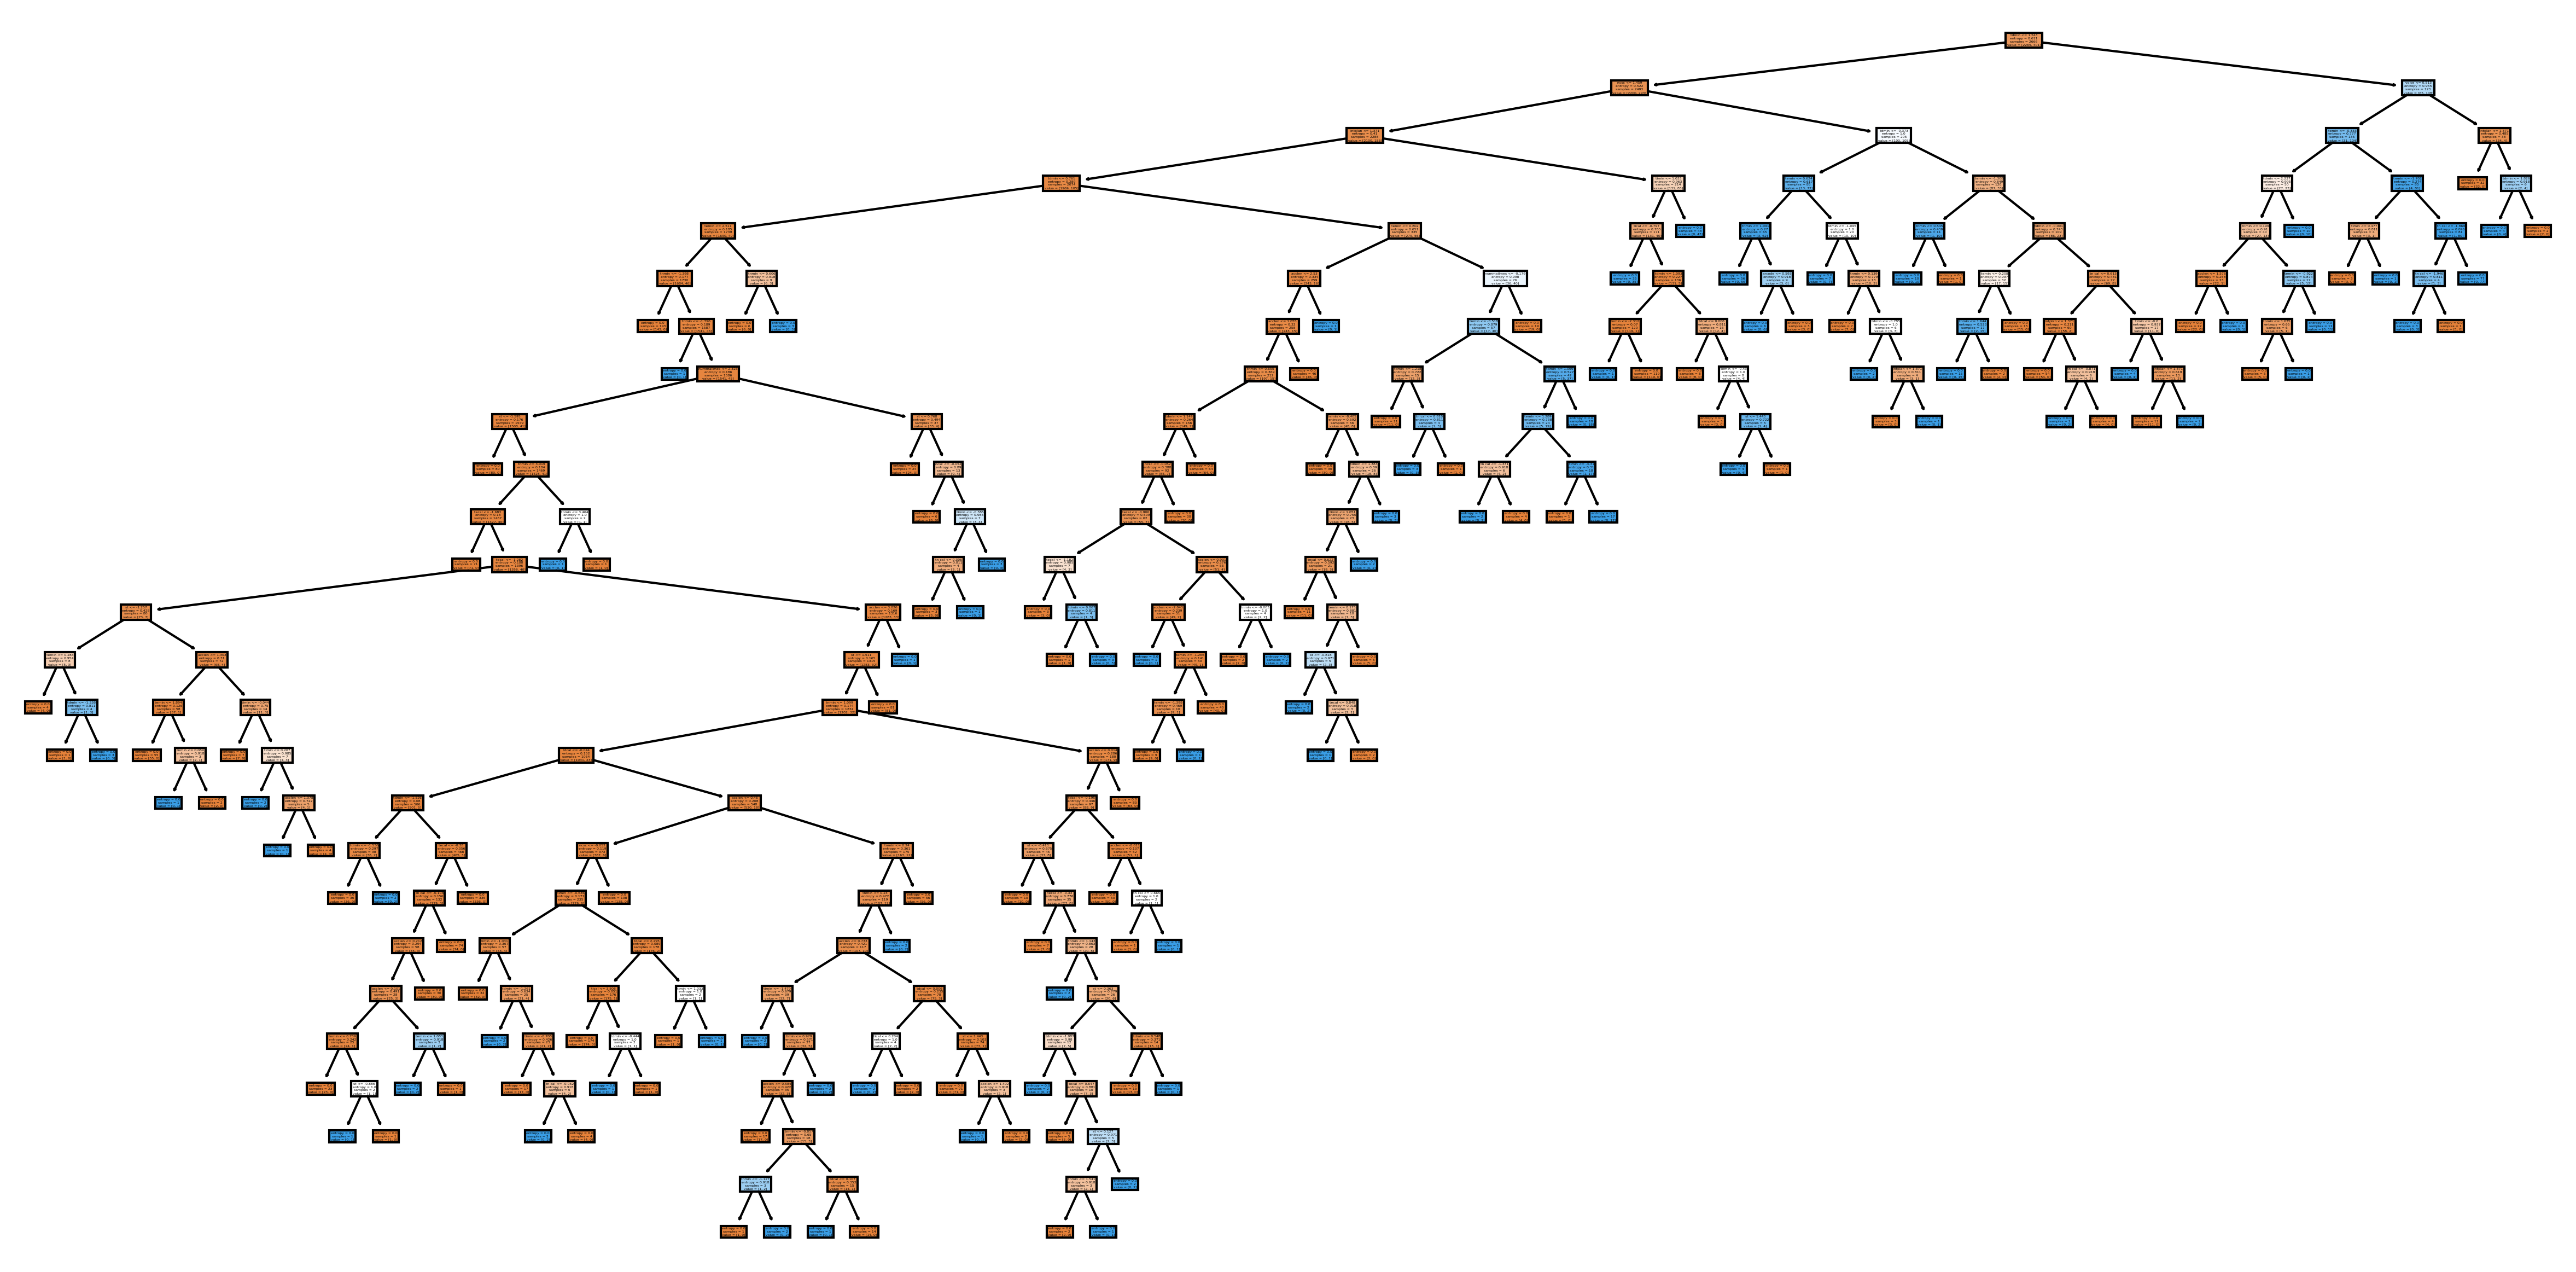

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(X_train, y_train)

report_model(entropy_tree)

#### **Parameter: Max Depth**

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       585
           1       0.88      0.44      0.59        82

    accuracy                           0.92       667
   macro avg       0.90      0.72      0.77       667
weighted avg       0.92      0.92      0.91       667





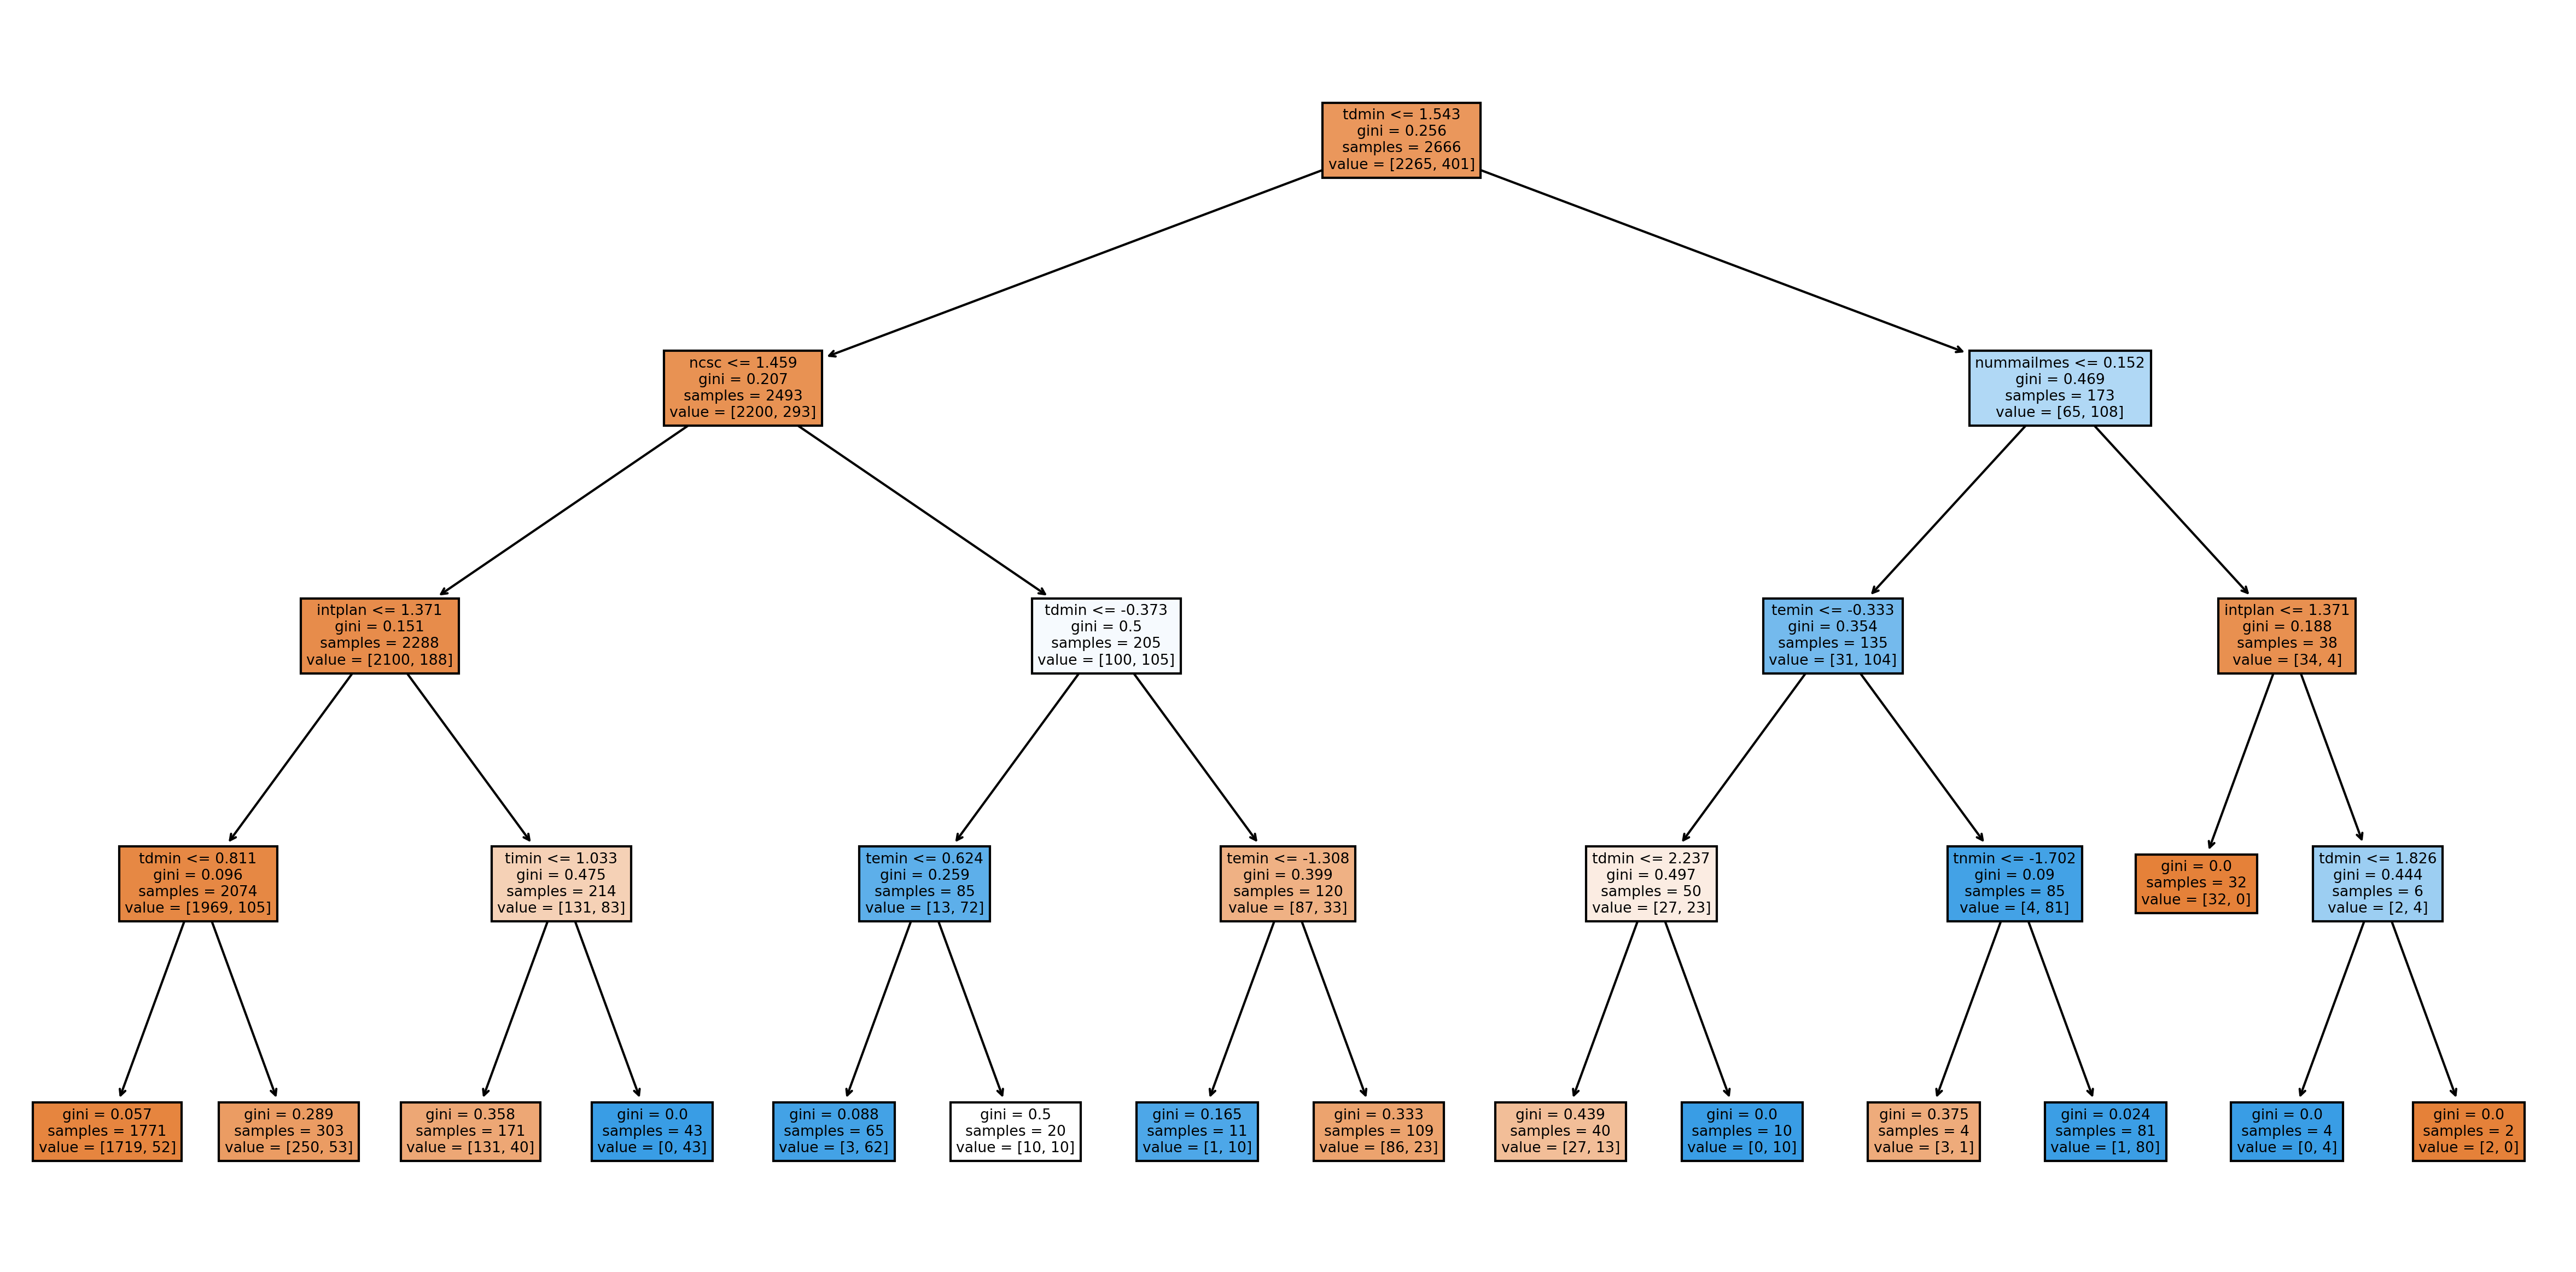

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth = 4)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       585
           1       0.83      0.73      0.78        82

    accuracy                           0.95       667
   macro avg       0.90      0.86      0.88       667
weighted avg       0.95      0.95      0.95       667





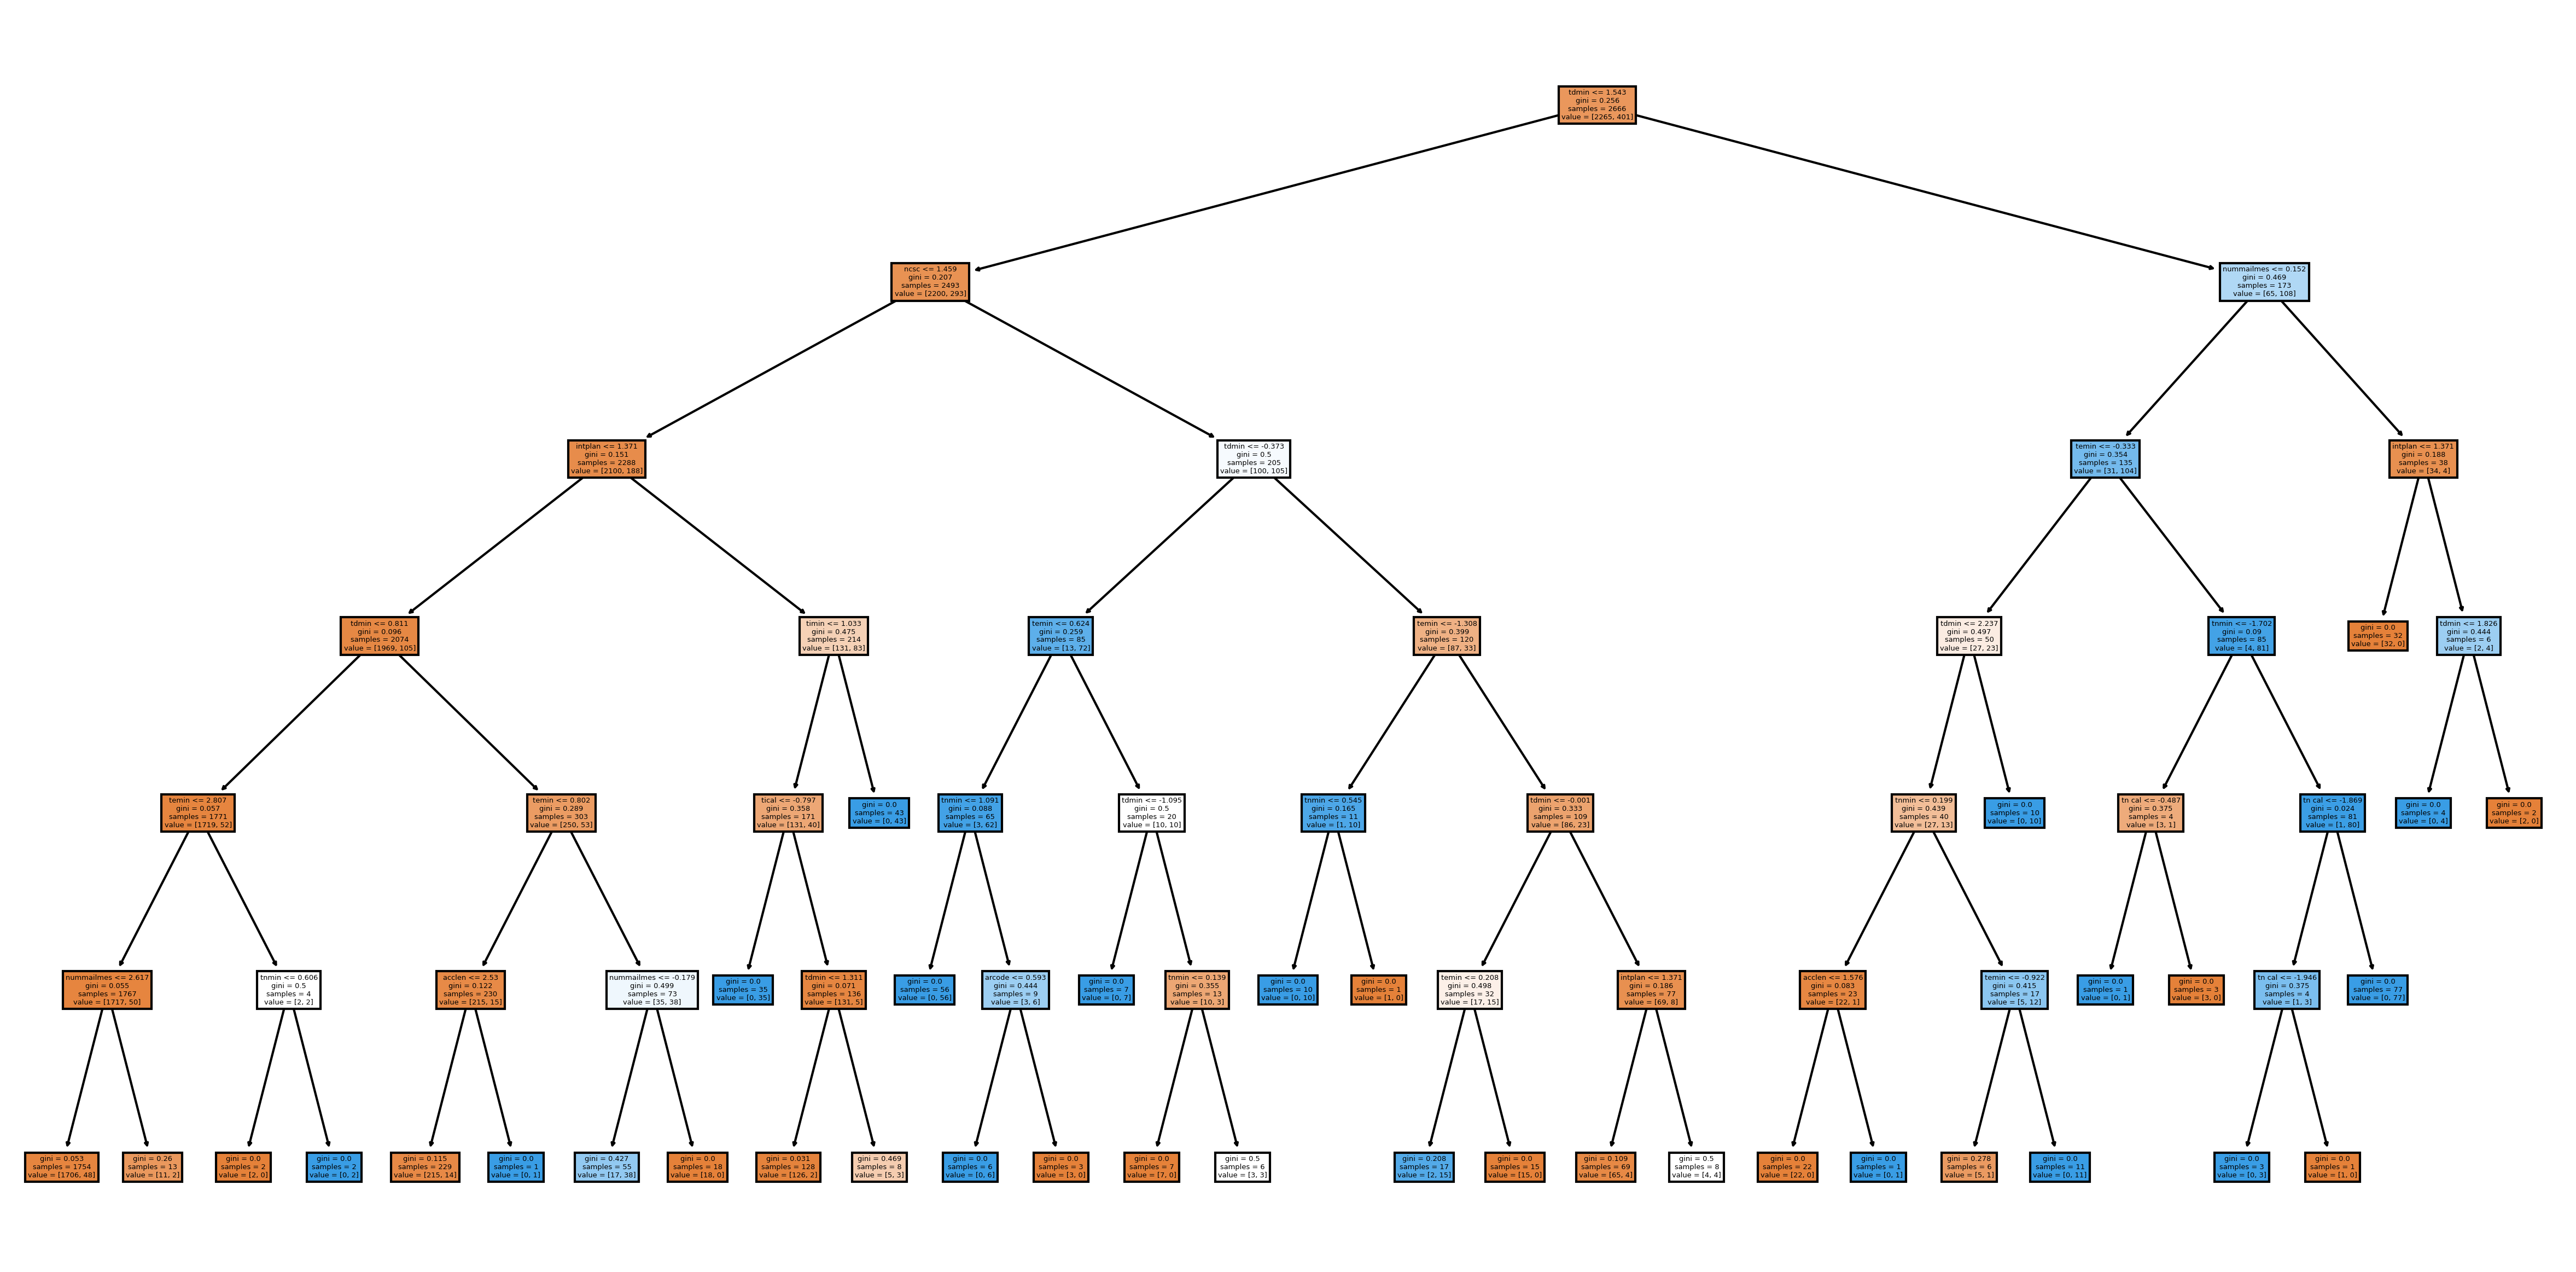

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth = 6)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       585
           1       0.81      0.76      0.78        82

    accuracy                           0.95       667
   macro avg       0.89      0.87      0.88       667
weighted avg       0.95      0.95      0.95       667





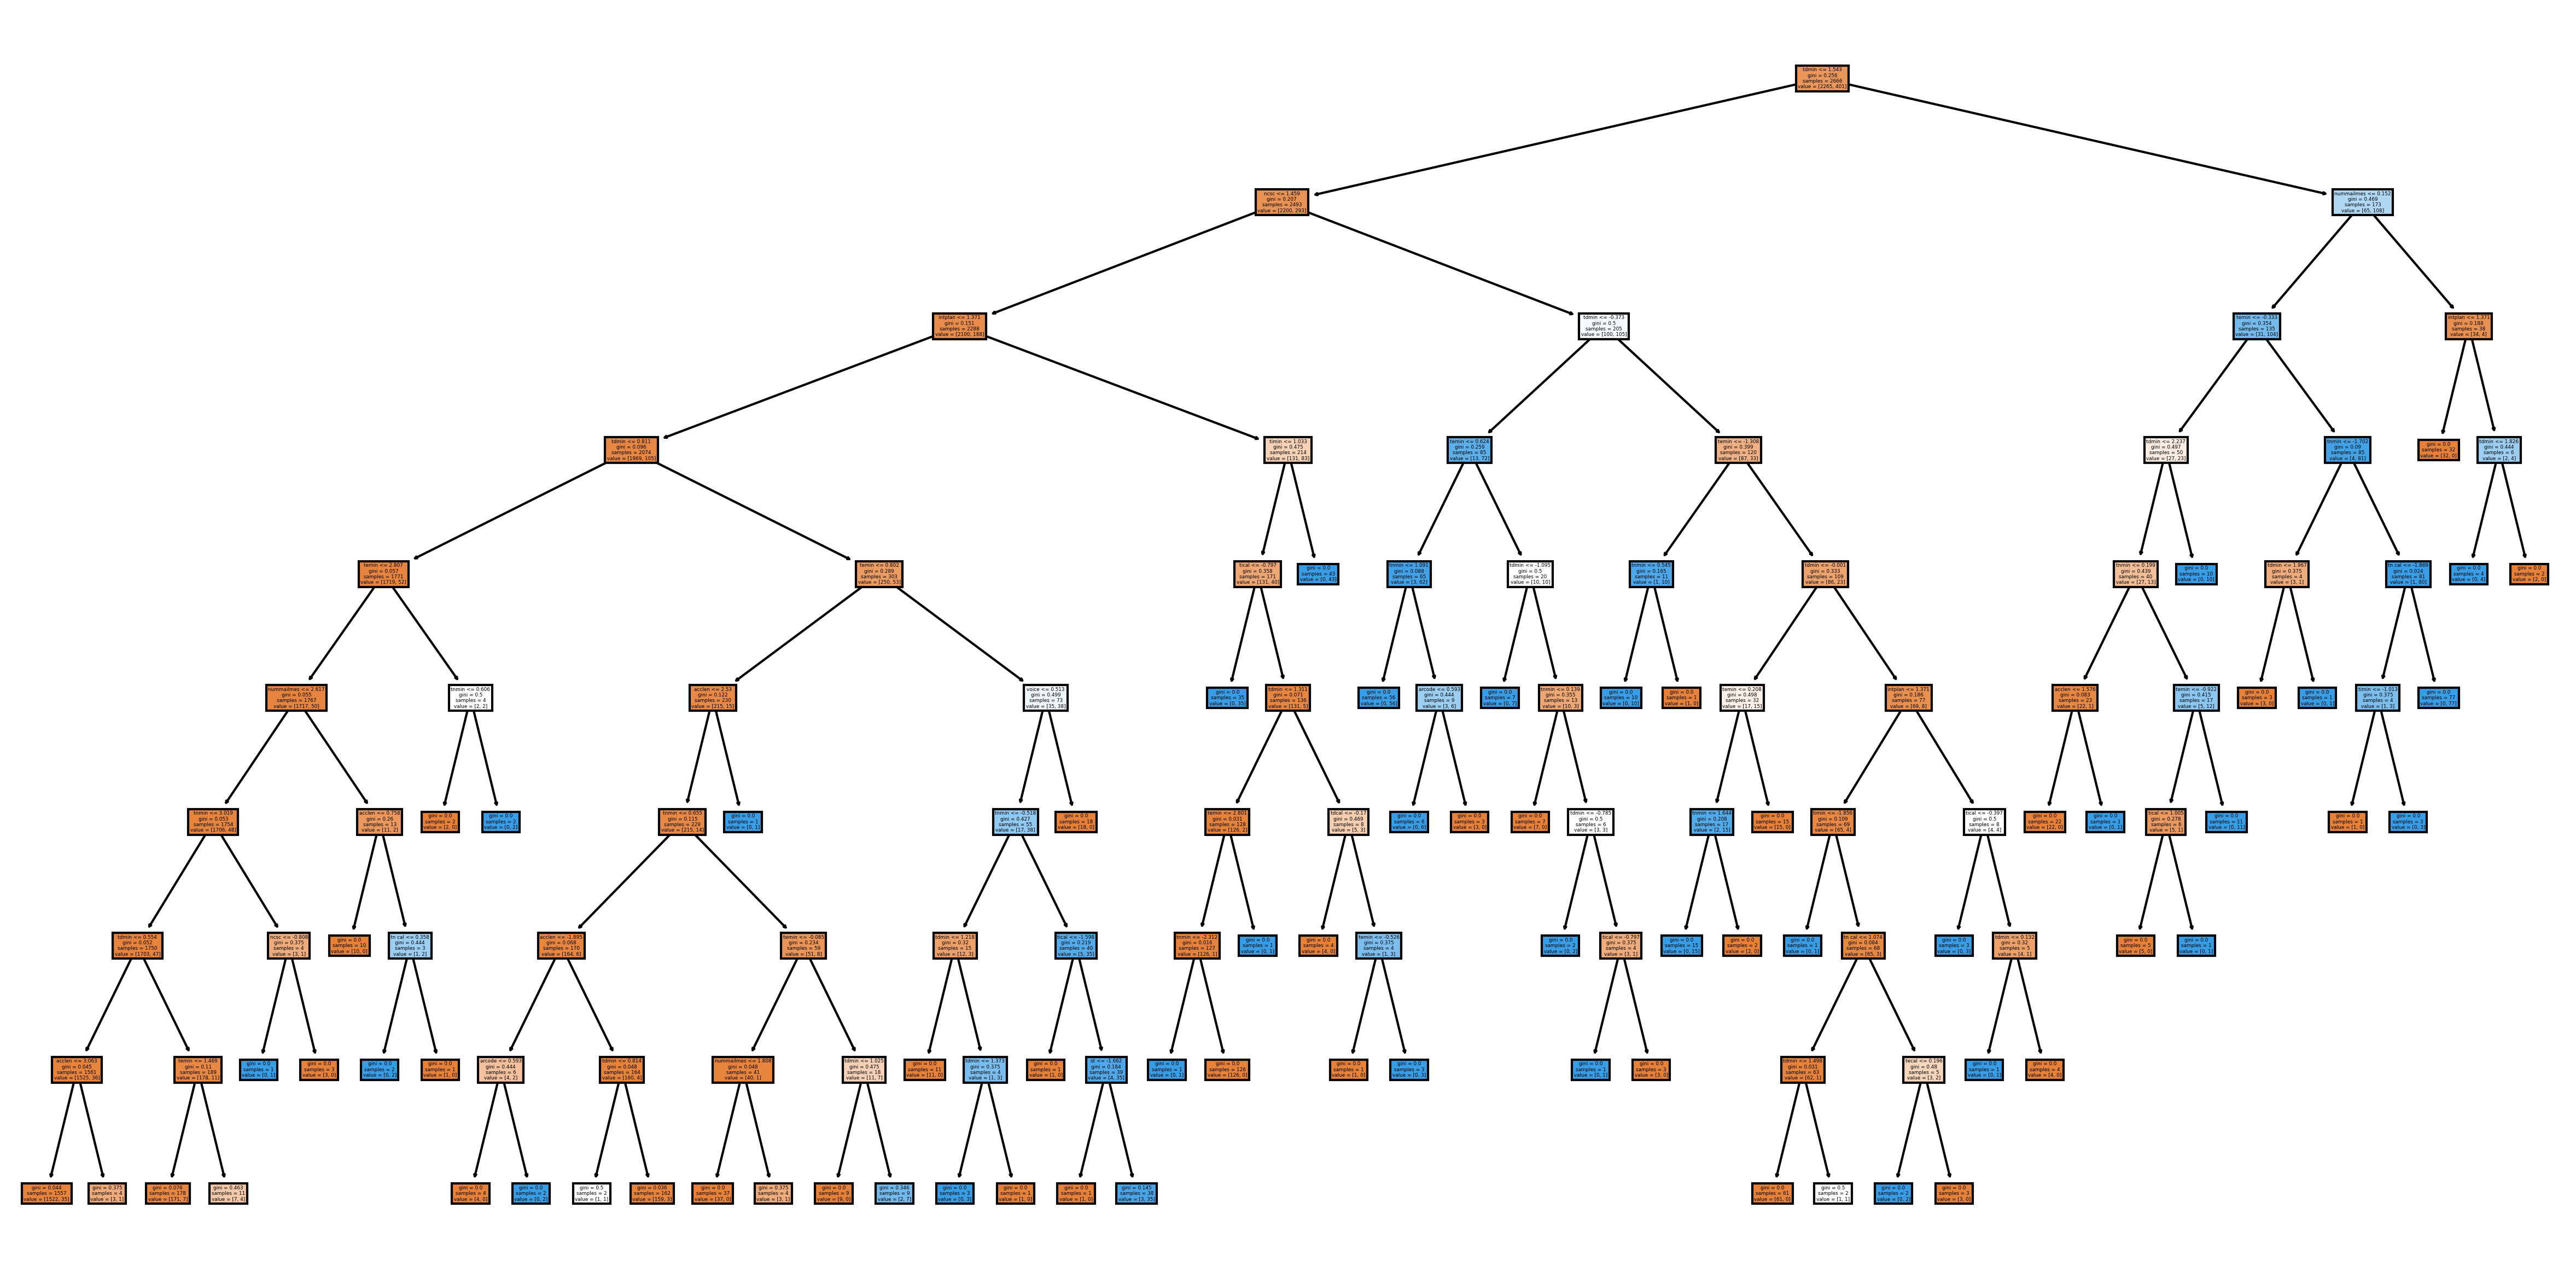

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth = 9)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

**Create a for loop to check for the classification report for different max_depth. Choose the best result.**


In [ ]:
# Based on the result below, when max_depth = 6/9, it gives us the best overall of precision & recall & f1-score result.
# We will now go ahead to create decision tree for max_depth = 6/9. (Code above)

for i in range(2,15):
  pruned_tree = DecisionTreeClassifier(max_depth = i)
  pruned_tree.fit(X_train,y_train)
  y_pred = pruned_tree.predict(X_test)
  print(f"WHEN max_depth = {i}")
  print(classification_report(y_test, y_pred))
  print("-" * 55)

WHEN max_depth = 2
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       585
           1       0.56      0.46      0.51        82

    accuracy                           0.89       667
   macro avg       0.74      0.71      0.72       667
weighted avg       0.88      0.89      0.88       667

-------------------------------------------------------
WHEN max_depth = 3
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       585
           1       0.92      0.40      0.56        82

    accuracy                           0.92       667
   macro avg       0.92      0.70      0.76       667
weighted avg       0.92      0.92      0.91       667

-------------------------------------------------------
WHEN max_depth = 4
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       585
           1       0.88      0.44      0.59        82

    accuracy 

#### **Parameter: Max Leaf Nodes**

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       585
           1       0.96      0.59      0.73        82

    accuracy                           0.95       667
   macro avg       0.95      0.79      0.85       667
weighted avg       0.95      0.95      0.94       667





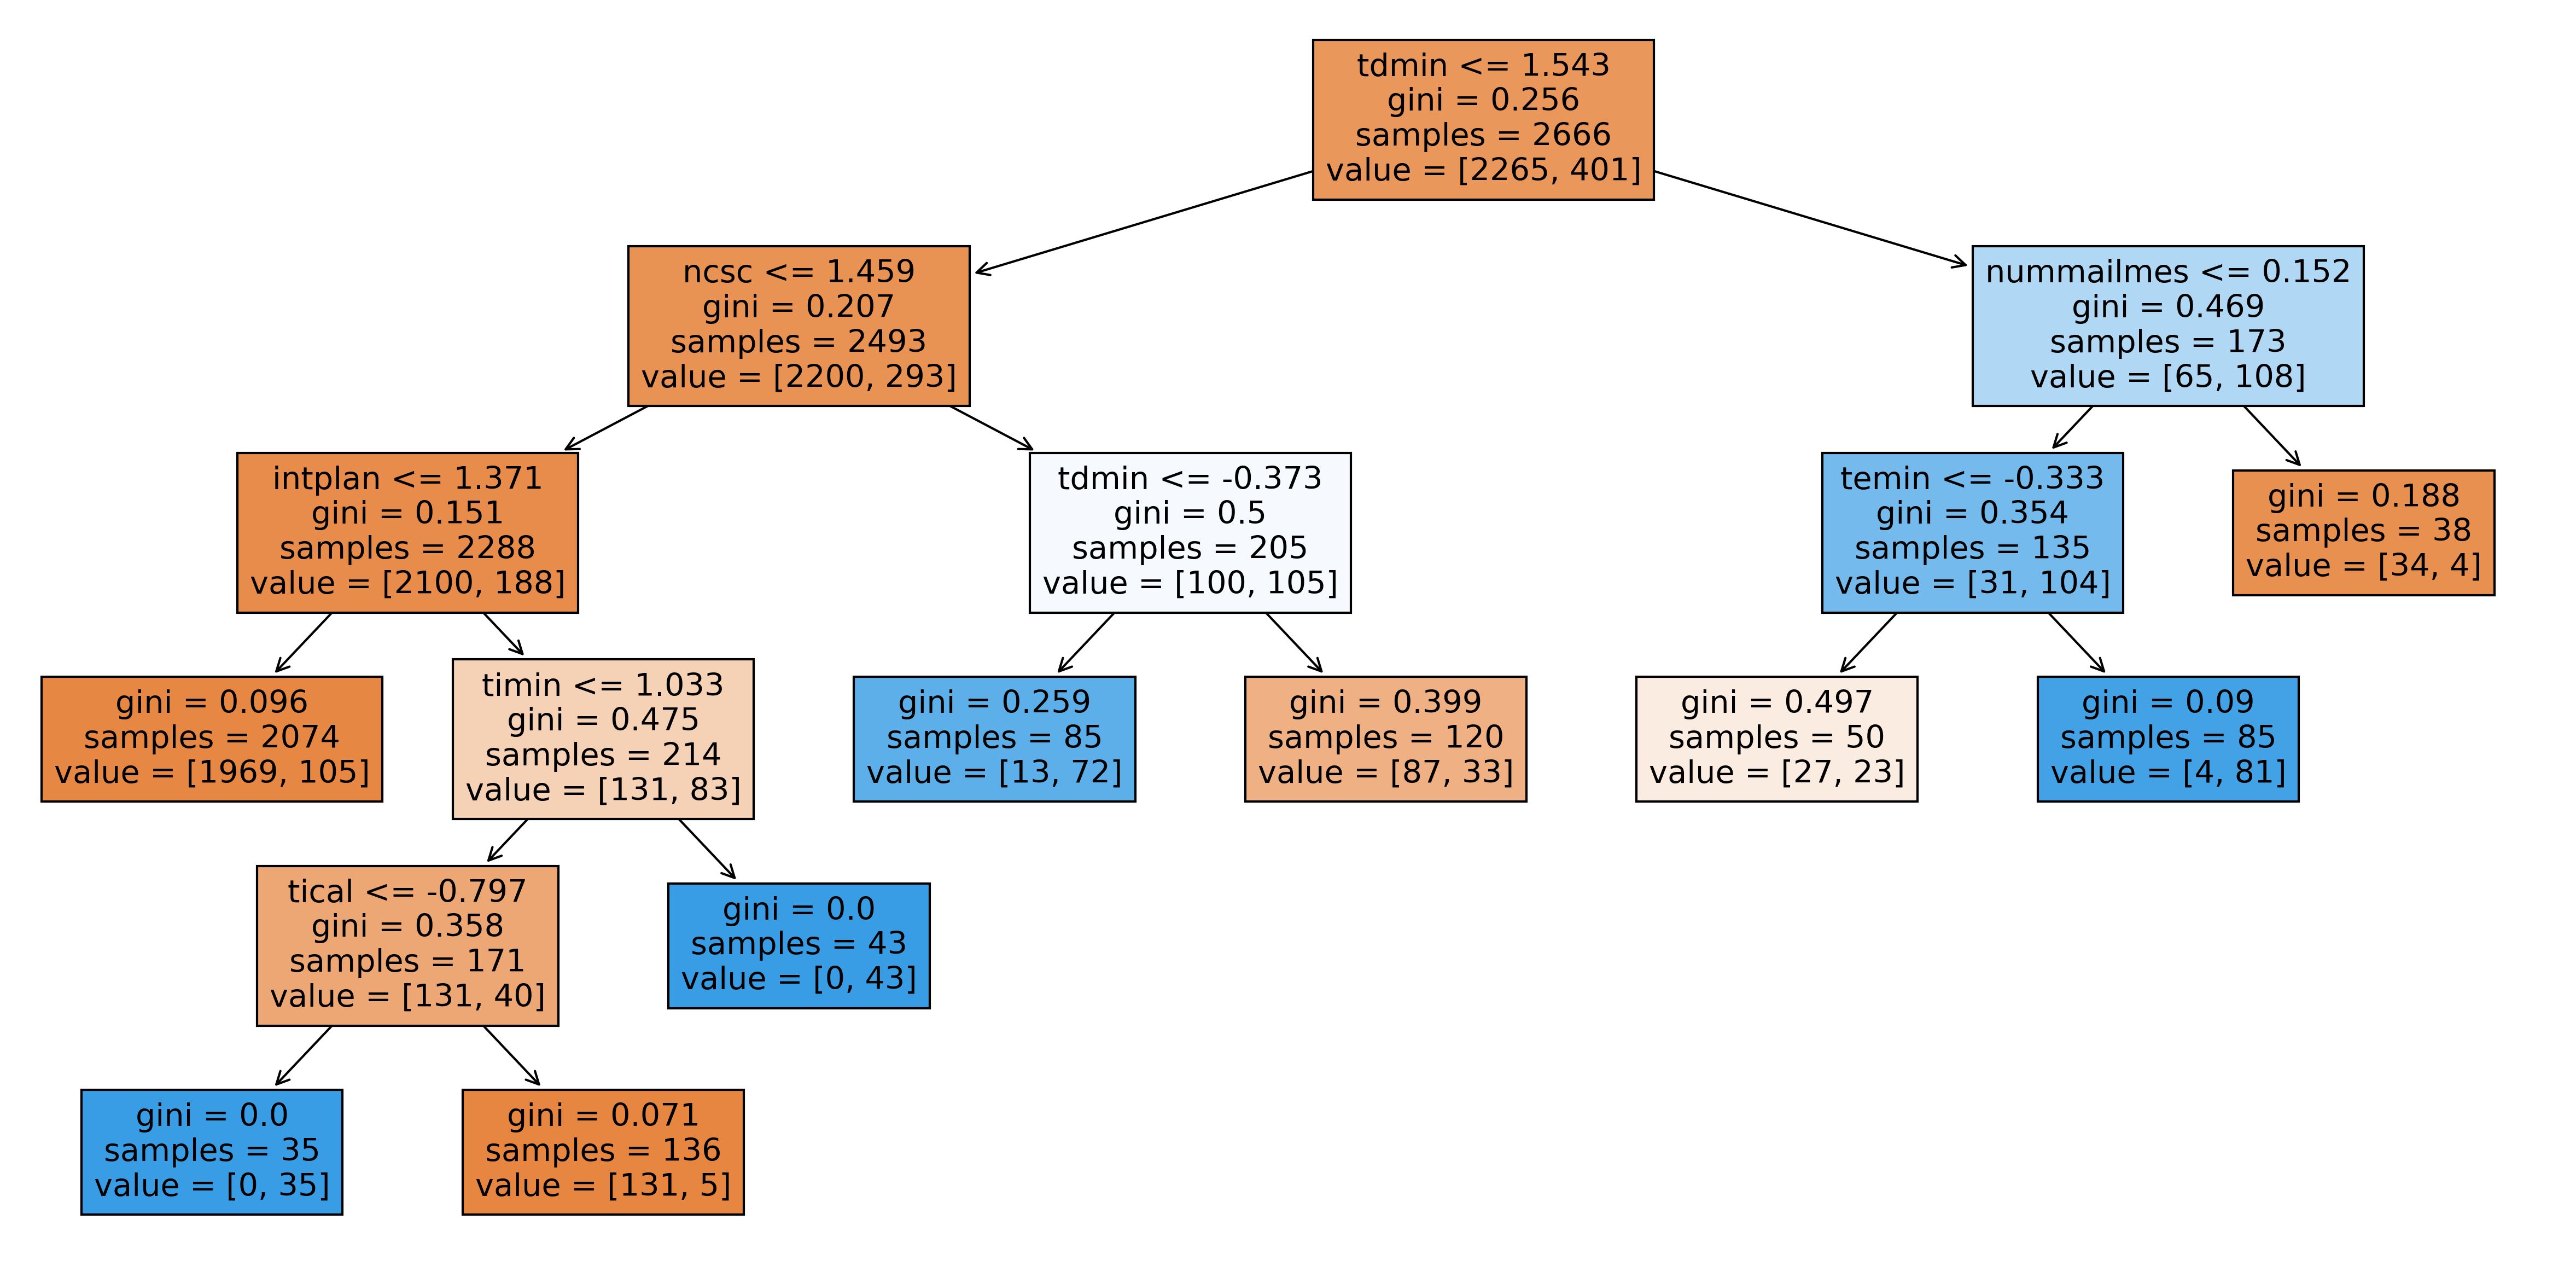

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes = 9)
pruned_tree.fit(X_train, y_train)

report_model(pruned_tree)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.90      0.68      0.78        82

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.95      0.95      0.95       667





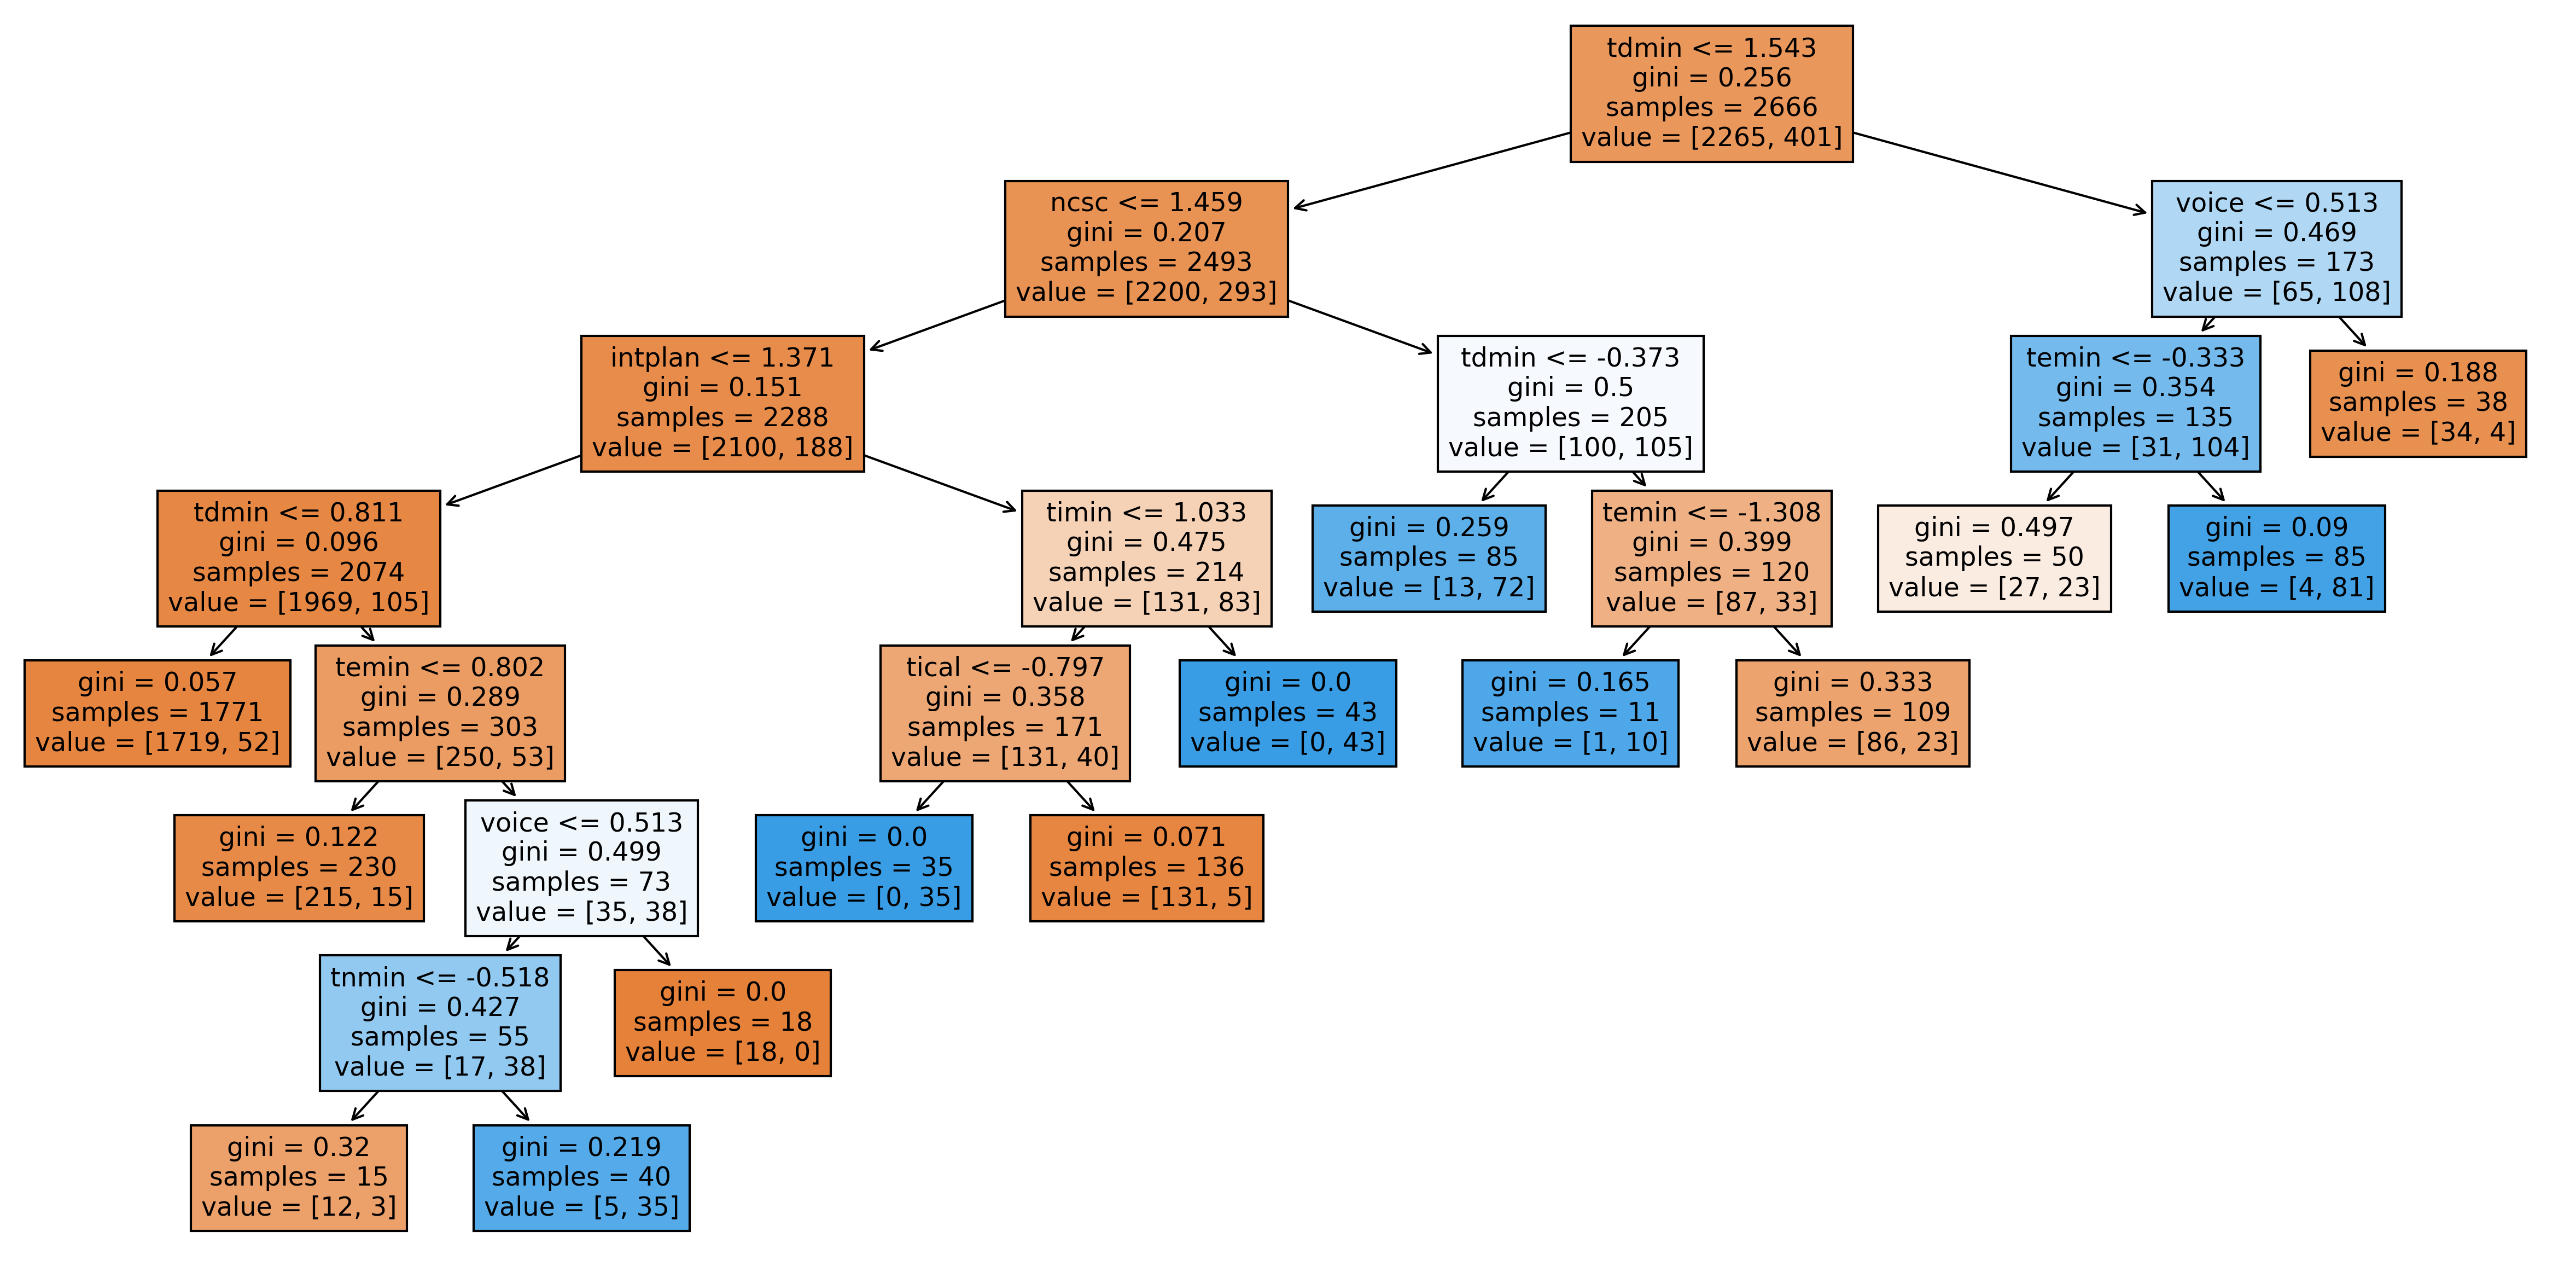

In [ ]:
# When max_leaf_nodes = 14, it gives overall best precision, recall & f1-score results

pruned_tree = DecisionTreeClassifier(max_leaf_nodes = 14)
pruned_tree.fit(X_train, y_train)

report_model(pruned_tree)

____
### **4. GridSearchCV : Search for Best parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier()
param_grid = {"criterion"         : ['gini', 'entropy'],
              "max_depth"         : list(range(5,15)),
              "max_leaf_nodes"    : list(range(5,15)),  
              "min_impurity_split": [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]}

grid = GridSearchCV(model, param_grid)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

0.9373590235470204

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 14,
 'min_impurity_split': 0.01}

### **5. Evaluation for best parameters checked from GridSearchCV**

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
confusion_matrix(y_test, grid_pred)

array([[579,   6],
       [ 26,  56]])

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.90      0.68      0.78        82

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.95      0.95      0.95       667



## **VI. Random Forests**

### **1.Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### **2. Choosing correct Number of Tree**

In [ ]:
error_rate= [ ] 
for n in range(100,201,5):
  rfc = RandomForestClassifier(n_estimators=n, max_features='auto')
  rfc.fit(X_train,y_train)
  y_pred = rfc.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test, y_pred))

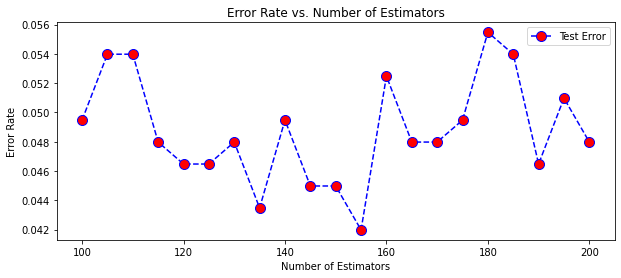

In [ ]:
from sklearn.metrics import accuracy_score

plt.figure(figsize = (10,4))
plt.plot(range(100,201,5), error_rate, color =  'blue', label = 'Test Error',  
         linestyle = '--', marker = 'o', markerfacecolor =  'red', markersize = 10) 
plt.title('Error Rate vs. Number of Estimators') 
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate') 
plt.legend()

#### **2. Train Model**

In [ ]:
model = RandomForestClassifier(n_estimators = 155)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### **3. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[580   5]
 [ 26  56]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.92      0.68      0.78        82

    accuracy                           0.95       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.95      0.95      0.95       667



## **VII. Ada Booster / Gradient Booster**

### **Ada Booster**

#### **1. Analyzing performance as more weak learners are added**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score

error_rate = []
for n in range(1, 100):
  model = AdaBoostClassifier(n_estimators = n)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test,  y_pred))

In [ ]:
print("n_estimators:", np.argmin(error_rate) + 1, "| Min Error Rate:", np.min(error_rate).round(2))
print("n_estimators:", np.argmax(error_rate) + 1, " | Max Error Rate:",   np.max(error_rate).round(2))  

n_estimators: 12 | Min Error Rate: 0.11
n_estimators: 88  | Max Error Rate: 0.13


**Plot “Error Rate” vs “Number of Estimators”**

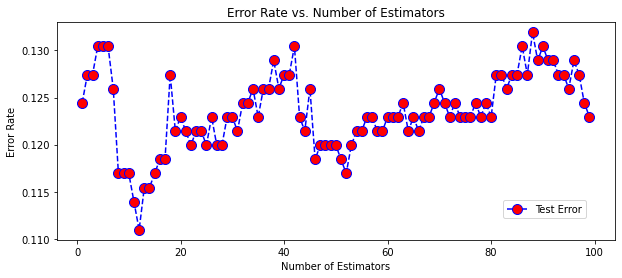

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(range(1, 100), error_rate, color =  'blue', label = 'Test Error',  
         linestyle = '--', marker = 'o', markerfacecolor =  'red', markersize = 10) 
plt.title('Error Rate vs. Number of Estimators') 
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate') 
plt.legend(loc = (0.8, 0.1))

#### **2. Train Model**

In [ ]:
model = AdaBoostClassifier(n_estimators = 12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### **3. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[560  25]
 [ 49  33]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       585
           1       0.57      0.40      0.47        82

    accuracy                           0.89       667
   macro avg       0.74      0.68      0.70       667
weighted avg       0.88      0.89      0.88       667



#### **4. Feature Importance**

In [ ]:
feats = pd.DataFrame(data = model.feature_importances_, 
                     index = X.columns, columns = ['Feature Importance'])
feats = feats.sort_values("Feature Importance")
feats

Feature Importance
acclen                0.000000
arcode                0.000000
nummailmes            0.000000
tecal                 0.000000
tn cal                0.000000
st                    0.083333
intplan               0.083333
voice                 0.083333
tdcal                 0.083333
temin                 0.083333
tnmin                 0.083333
timin                 0.083333
tical                 0.083333
tdmin                 0.166667
ncsc                  0.166667

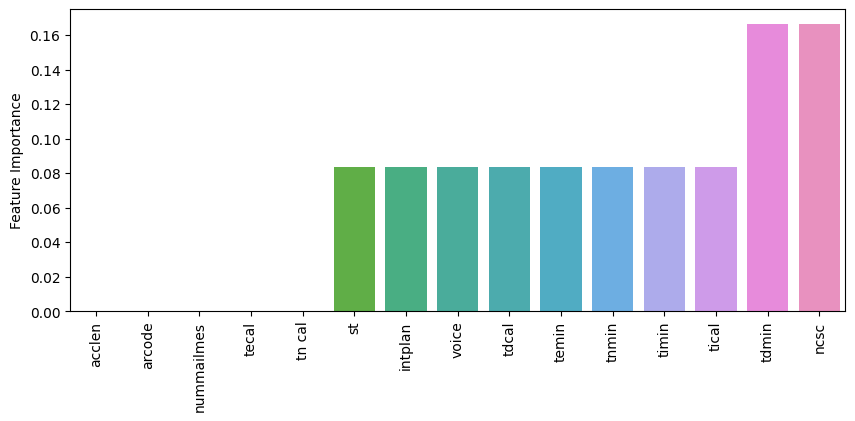

In [ ]:
plt.figure(figsize=(10, 4), dpi = 100)
sns.barplot(x = feats.index, y = feats["Feature Importance"])
plt.xticks(rotation=90);

### **Gradient Boosting**

#### **1. GridSearchCV : Search for Best parameters**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()
param_grid = {"n_estimators": [100,120,140,150,160,170,180],
              "max_depth": [3,4,5,6,7,8]}

grid = GridSearchCV(model, param_grid)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [ ]:
grid.best_score_  

0.9527401254997855

In [ ]:
grid.best_params_ 

{'max_depth': 6, 'n_estimators': 160}

In [ ]:
grid_pred = grid.predict(X_test) 

#### **2. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test, grid_pred))

[[575  10]
 [ 19  63]]


In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       585
           1       0.86      0.77      0.81        82

    accuracy                           0.96       667
   macro avg       0.92      0.88      0.89       667
weighted avg       0.96      0.96      0.96       667



#### **4. Feature Importance**

In [ ]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_, 
                     index = X.columns, columns = ['Feature Importance'])
feats = feats.sort_values("Feature Importance")
feats

Feature Importance
arcode                0.005522
st                    0.010996
tn cal                0.011778
tdcal                 0.011804
tecal                 0.012455
acclen                0.019188
nummailmes            0.026954
voice                 0.045019
tnmin                 0.061069
intplan               0.079891
timin                 0.080388
tical                 0.088071
ncsc                  0.113849
temin                 0.148044
tdmin                 0.284972

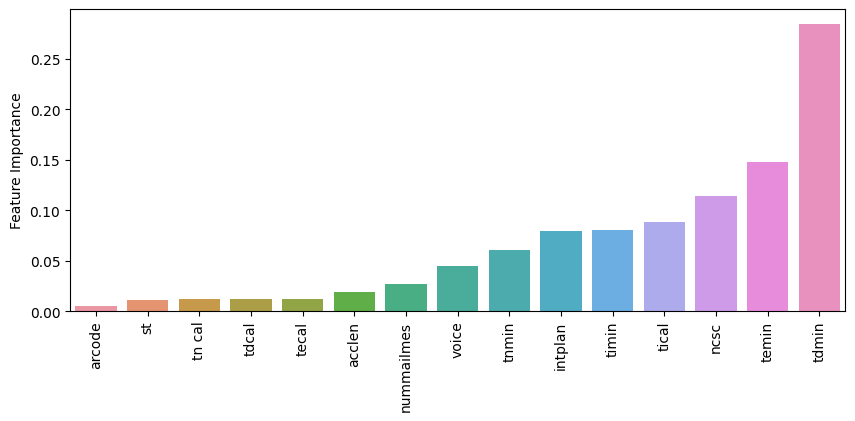

In [ ]:
plt.figure(figsize=(10, 4), dpi = 100)
sns.barplot(x = feats.index, y = feats["Feature Importance"])
plt.xticks(rotation=90);

___
# **Part 7: Improvement - Remove the Outliers & Reevaluation** 

In [ ]:
# Save original data into varibale `ori_df`
ori_df = df.copy()

In [ ]:
df.head(3)

acclen arcode  nummailmes  tdmin  tdcal  ...  ncsc  st  intplan  voice  label
0     128    415          25  265.1    110  ...     1  16        0      1      0
1     107    415          26  161.6    123  ...     1  35        0      1      0
2     137    415           0  243.4    114  ...     0  31        0      0      0

[3 rows x 16 columns]

### **1. Create a boxplot to show the info of all features**

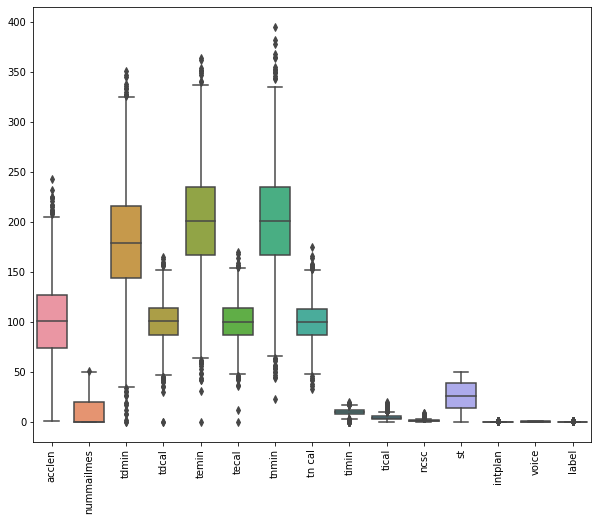

In [ ]:
# The value of different features are in different range. 
# So we can group and compare some continuous features that are in same range.
plt.figure(figsize = (10,8))
sns.boxplot(data = df)
plt.xticks(rotation = 90);

### **2. Create few breakdown of Boxplot to show the outlier information of some features**

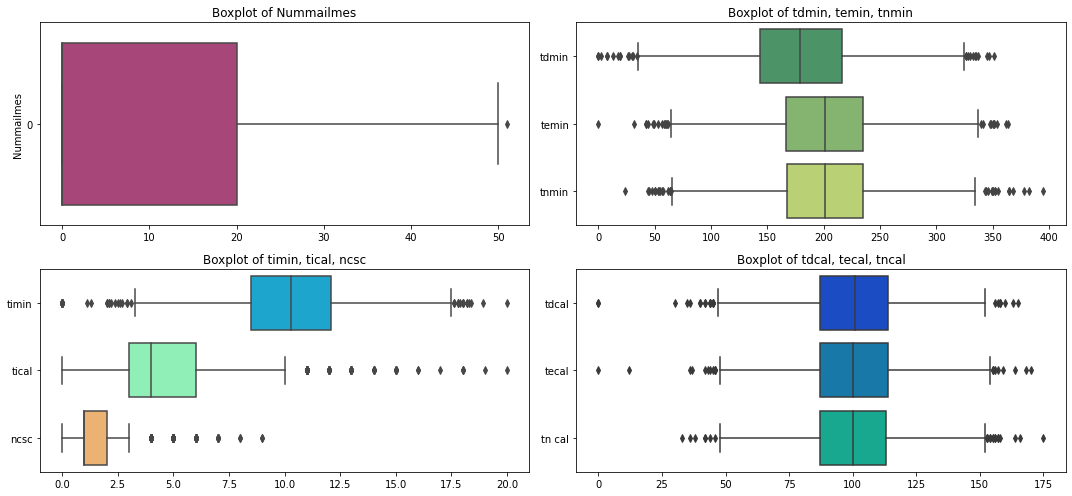

In [ ]:
# I will remove the outliers of all features below, except for ncsc, as it is quite important categorical features

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 7))

sns.boxplot(data = df["nummailmes"], orient = "h", ax = axes[0, 0], palette = "magma")
axes[0, 0].set_title("Boxplot of Nummailmes")
axes[0, 0].set_ylabel("Nummailmes")

sns.boxplot(data = df[["tdmin", "temin", "tnmin"]] , orient = "h", ax = axes[0, 1], palette = "summer")
axes[0, 1].set_title("Boxplot of tdmin, temin, tnmin")

sns.boxplot(data = df[["timin", "tical", "ncsc"]]  , orient = "h", ax = axes[1, 0], palette = "rainbow")
axes[1, 0].set_title("Boxplot of timin, tical, ncsc")

sns.boxplot(data = df[["tdcal", "tecal", "tn cal"]], orient = "h", ax = axes[1, 1], palette = "winter")
axes[1, 1].set_title("Boxplot of tdcal, tecal, tncal")

plt.tight_layout()

### **3. Find out Outliers**

#### **Example of finding outliers of "tdmin" feature**

In [ ]:
from numpy import percentile

q25, q75 = percentile(df["tdmin"], 25), percentile(df["tdmin"], 75)
iqr = q75 - q25
print(f"Percentiles: 25th= {q25:.2f}, 75th= {q75:.2f}, IQR= {iqr:.2f}")
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(f"Feature: tdmin -> Lower: {lower:.2f}, Upper: {upper:.2f}")
print()

outliers = [x for x in df["tdmin"] if x < lower or x > upper]
print(f"Identified outliers: {len(outliers)}")
# remove outliers
outliers_removed = [x for x in df["tdmin"] if x >= lower and x <= upper]
print(f"Non-outlier observations: {len(outliers_removed)}")
print()

print("Outliers to be removed:")
print(df[(df['tdmin'] < lower) | (df['tdmin'] > upper)])

Percentiles: 25th= 143.70, 75th= 216.40, IQR= 72.70
Feature: tdmin -> Lower: 34.65, Upper: 325.45

Identified outliers: 25
Non-outlier observations: 3308

Outliers to be removed:
      st  acclen  arcode  intplan  voice  ...  tn cal  timin  tical  ncsc  label
15    34     161     415        0      0  ...     128    5.4      9     4      1
156   35      83     415        0      0  ...     114   15.8      7     0      1
197   43     208     510        0      0  ...     102   10.7      6     2      1
365    5     154     415        0      0  ...     100   10.1      9     1      1
605   24     112     415        0      0  ...     132   12.7      8     2      1
685    5      63     415        0      1  ...     101    8.6      7     1      0
741   29      66     415        0      0  ...     120   11.5      3     0      0
975    8     129     510        0      0  ...      83   10.4      6     0      1
985   34      64     415        1      0  ...     102   13.3      9     1      1
1052  37   

#### **Collecting outliers for all continuous feature**

In [ ]:
from numpy import percentile
df_2 = pd.DataFrame()

for feature in ["nummailmes", "tdmin", "temin", "tnmin", "tdcal", "tecal", "tn cal", "timin", "tical"]:
  q25, q75 = percentile(df[feature], 25), percentile(df[feature], 75)
  iqr = q75 - q25
  print(f"Percentiles: 25th= {q25:.2f}, 75th= {q75:.2f}, IQR= {iqr:.2f}")
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  print(f"Feature: {feature} -> Lower: {lower:.2f}, Upper: {upper:.2f}")

  df_toberemoved = df[(df[feature] < lower) | (df[feature] > upper)]
  df_2 = pd.concat([df_2, df_toberemoved])   # concat all rows to be removed into df_2

  if feature in ["nummailmes", "tnmin", "tn cal"]:
    print("-" * 50)
  else:
    print()

Percentiles: 25th= 0.00, 75th= 20.00, IQR= 20.00
Feature: nummailmes -> Lower: -30.00, Upper: 50.00
--------------------------------------------------
Percentiles: 25th= 143.70, 75th= 216.40, IQR= 72.70
Feature: tdmin -> Lower: 34.65, Upper: 325.45

Percentiles: 25th= 166.60, 75th= 235.30, IQR= 68.70
Feature: temin -> Lower: 63.55, Upper: 338.35

Percentiles: 25th= 167.00, 75th= 235.30, IQR= 68.30
Feature: tnmin -> Lower: 64.55, Upper: 337.75
--------------------------------------------------
Percentiles: 25th= 87.00, 75th= 114.00, IQR= 27.00
Feature: tdcal -> Lower: 46.50, Upper: 154.50

Percentiles: 25th= 87.00, 75th= 114.00, IQR= 27.00
Feature: tecal -> Lower: 46.50, Upper: 154.50

Percentiles: 25th= 87.00, 75th= 113.00, IQR= 26.00
Feature: tn cal -> Lower: 48.00, Upper: 152.00
--------------------------------------------------
Percentiles: 25th= 8.50, 75th= 12.10, IQR= 3.60
Feature: timin -> Lower: 3.10, Upper: 17.50

Percentiles: 25th= 3.00, 75th= 6.00, IQR= 3.00
Feature: tical ->

In [ ]:
# All the outliers rows are added inside df_2, some are duplicated.
# Check the duplicated value by:
df_2[df_2.duplicated(keep = "first")]

st  acclen  arcode  intplan  voice  ...  tn cal  timin  tical  ncsc  label
1345  41      98     415        0      0  ...      88    6.8      1     4      1
1397  46     101     510        0      0  ...      95    7.2      4     1      0
2932  44      97     415        0      0  ...      94   11.8      6     1      0
315   19      39     408        0      0  ...      46   12.4      3     1      0
2736  36     127     510        0      1  ...     156    9.2      5     3      0
3234   8      75     510        0      1  ...     153    2.5      5     1      0
883   50      42     408        0      0  ...     117    8.0     12     1      0
1960  43      38     510        0      0  ...      93   13.9     11     0      0

[8 rows x 16 columns]

In [ ]:
# Remove all the duplicated rows in df_2 (All the outlier rows to be removed)
# df_2: From 269 rows -> 261 rows (269 - 8)

print(f"Total original rows in df_2  : {len(df_2)}") 
print(f"Total duplicated rows in df_2: {sum(df_2.duplicated())}")  # keep : {'first', 'last', False}, default 'first'
print()

print("Removing all the duplicated rows in df_2 now ...")
df_2.drop_duplicates(keep = "first", inplace = True)  # keep : {'first', 'last', False}, default 'first'

print(f"Total rows in df_2 now           : {len(df_2)}")
print(f"Total duplicated rows in df_2 now: {sum(df_2.duplicated())}") 

Total original rows in df_2  : 269
Total duplicated rows in df_2: 8

Removing all the duplicated rows in df_2 now ...
Total rows in df_2 now           : 261
Total duplicated rows in df_2 now: 0


#### **Check the label ratio of the outliers before removing**



In [ ]:
df["label"].value_counts()

0    2850
1     483
Name: label, dtype: int64

In [ ]:
df_2["label"].value_counts()

0    217
1     44
Name: label, dtype: int64

In [ ]:
# Ratio is quite similar, so acceptable to remove all the outliers in df_2

print("df:")
print(f"Loyal Rate: {round(2850/(2850+483) * 100, 2)}%")
print(f"Churn Rate: {round( 483/(2850+483) * 100, 2)}%")
print()

print("df_2:")
print(f"Loyal Rate: {round(217/(217+44) * 100, 2)}%")
print(f"Churn Rate: {round( 44/(217+44) * 100, 2)}%")

df:
Loyal Rate: 85.51%
Churn Rate: 14.49%

df_2:
Loyal Rate: 83.14%
Churn Rate: 16.86%


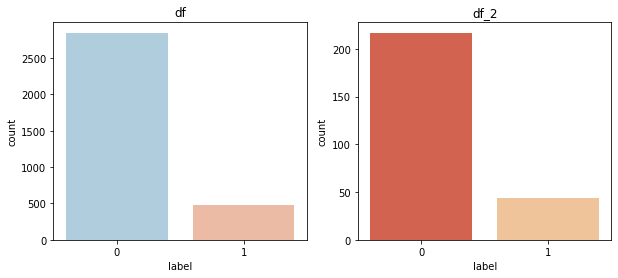

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

sns.countplot(x = df["label"], palette = "RdBu_r", ax = axes[0])
axes[0].set_title("df")

sns.countplot(x = df_2["label"], palette = "OrRd_r", ax = axes[1])
axes[1].set_title("df_2");

### **4. Remove Outliers**

#### **Method 1: Concat two df -> Select the uncommon df index (Remove duplicated rows)**

In [ ]:
# Remove all the duplicated rows (df_2) from our original dataset (df)
# df: From 3333 rows -> 3072 rows (3333 - 261)

# df.index.difference(a.index)                = The uncommon df index
# df.loc[df.index.difference(df_2.index), :]  = Rows: Uncommon rows, Cols: All

df = df.loc[df.index.difference(df_2.index), :]
df

acclen arcode  nummailmes  tdmin  tdcal  ...  ncsc  st  intplan  voice  label
0        128    415          25  265.1    110  ...     1  16        0      1      0
1        107    415          26  161.6    123  ...     1  35        0      1      0
2        137    415           0  243.4    114  ...     0  31        0      0      0
4         75    415           0  166.7    113  ...     3  36        1      0      0
5        118    510           0  223.4     98  ...     0   1        1      0      0
...      ...    ...         ...    ...    ...  ...   ...  ..      ...    ...    ...
3328     192    415          36  156.2     77  ...     2   3        0      1      0
3329      68    415           0  231.1     57  ...     3  49        0      0      0
3330      28    510           0  180.8    109  ...     2  39        0      0      0
3331     184    510           0  213.8    105  ...     2   6        1      0      0
3332      74    415          25  234.4    113  ...     0  42        0      1      0

[3072 rows x 16 columns]

#### **Method 2: Merge 2 df by Left/Right join -> Select the uncommon rows (Without duplicated rows)**

In [ ]:
# df_2.columns.to_list() = ['st', 'acclen', 'arcode', 'intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal', 
#                           'temin', 'tecal', 'tnmin', 'tn cal', 'timin', 'tical', 'ncsc', 'label']

# indicator : bool or str, default False
# - If True, adds a column to the output DataFrame called "_merge" with information on the source of each row. 
# - The column can be given a different name by providing a string argument. 
# - The column will have a Categorical type with the value of "left_only" for observations whose merge key only appears in the left DataFrame, 
#   "right_only" for observations whose merge key only appears in the right DataFrame, 
#   and "both" if the observation's merge key is found in both DataFrames.

x = df.merge(df_2, on = df_2.columns.to_list(), how='left', indicator = True)
x = x.loc[x._merge == 'left_only', x.columns != '_merge']   # Rows: col `_merge` == "left_only", Cols : All except "_merge"

# df = x

st  acclen  arcode  intplan  voice  ...  tn cal  timin  tical  ncsc  label
0     16     128     415        0      1  ...      91   10.0      3     1      0
1     35     107     415        0      1  ...     103   13.7      3     1      0
2     31     137     415        0      0  ...     104   12.2      5     0      0
3     36      75     415        1      0  ...     121   10.1      3     3      0
4      1     118     510        1      0  ...     118    6.3      6     0      0
...   ..     ...     ...      ...    ...  ...     ...    ...    ...   ...    ...
3067   3     192     415        0      1  ...      83    9.9      6     2      0
3068  49      68     415        0      0  ...     123    9.6      4     3      0
3069  39      28     510        0      0  ...      91   14.1      6     2      0
3070   6     184     510        1      0  ...     137    5.0     10     2      0
3071  42      74     415        0      1  ...      77   13.7      4     0      0

[3072 rows x 16 columns]

##### **Example of breakdown code before I assign x = x.loc[x._merge == 'left_only', x.columns != '_merge']**

In [ ]:
x = df.merge(df_2, on = df_2.columns.to_list(), how='left', indicator = True)
x.head(4)

st  acclen  arcode  intplan  voice  ...  timin  tical  ncsc  label     _merge
0  16     128     415        0      1  ...   10.0      3     1      0  left_only
1  35     107     415        0      1  ...   13.7      3     1      0  left_only
2  31     137     415        0      0  ...   12.2      5     0      0  left_only
3  36      75     415        1      0  ...   10.1      3     3      0  left_only

[4 rows x 17 columns]

In [ ]:
x[x["_merge"] == "left_only"].head(3)

st  acclen  arcode  intplan  voice  ...  timin  tical  ncsc  label     _merge
0  16     128     415        0      1  ...   10.0      3     1      0  left_only
1  35     107     415        0      1  ...   13.7      3     1      0  left_only
2  31     137     415        0      0  ...   12.2      5     0      0  left_only

[3 rows x 17 columns]

In [ ]:
x.columns != '_merge'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [ ]:
x = x.loc[x._merge == 'left_only', x.columns != '_merge']   # Rows: col `_merge` == "left_only", Cols : All except "_merge"
# df = x

### **5. Boxplot after removal of outliers**


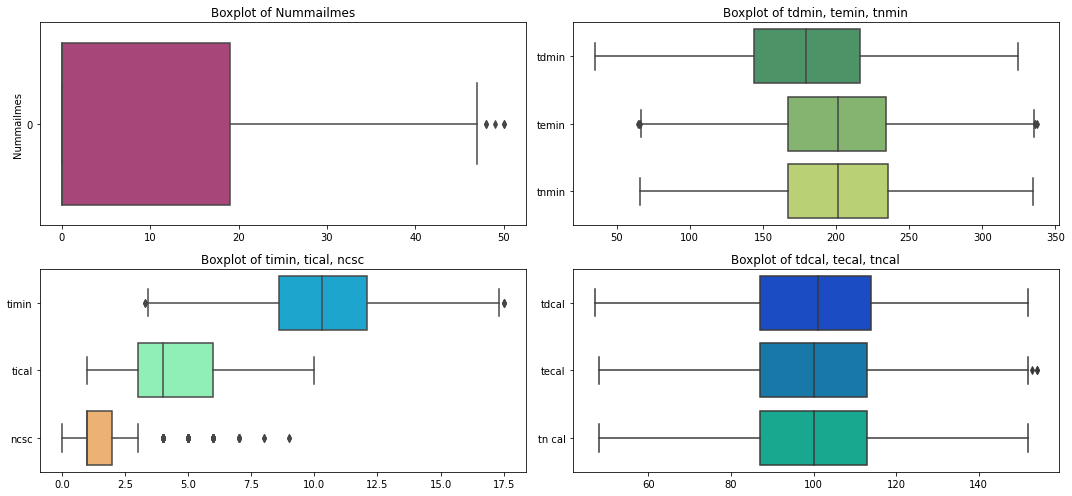

In [ ]:
# There still have few outliers bcz after we have removed the outliers, Python will internally calculate the new ouliers based on the 
# new dataset we have passed in.
# But still we can obviously observe that the outliers amount have decreased lots after we preprocessed the data

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 7))

sns.boxplot(data = df["nummailmes"], orient = "h", ax = axes[0, 0], palette = "magma")
axes[0, 0].set_title("Boxplot of Nummailmes")
axes[0, 0].set_ylabel("Nummailmes")

sns.boxplot(data = df[["tdmin", "temin", "tnmin"]] , orient = "h", ax = axes[0, 1], palette = "summer")
axes[0, 1].set_title("Boxplot of tdmin, temin, tnmin")

sns.boxplot(data = df[["timin", "tical", "ncsc"]]  , orient = "h", ax = axes[1, 0], palette = "rainbow")
axes[1, 0].set_title("Boxplot of timin, tical, ncsc")

sns.boxplot(data = df[["tdcal", "tecal", "tn cal"]], orient = "h", ax = axes[1, 1], palette = "winter")
axes[1, 1].set_title("Boxplot of tdcal, tecal, tncal")

plt.tight_layout()

### **6. Fit and Test model**

#### **Build a model**

In [ ]:
print(ori_df.shape)
print(df.shape)

(3333, 16)
(3072, 16)


In [ ]:
X = df.drop(["label"], axis = 1)
y = df["label"]

#### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 1638 to 951
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      2457 non-null   int64  
 1   arcode      2457 non-null   object 
 2   nummailmes  2457 non-null   int64  
 3   tdmin       2457 non-null   float64
 4   tdcal       2457 non-null   int64  
 5   temin       2457 non-null   float64
 6   tecal       2457 non-null   int64  
 7   tnmin       2457 non-null   float64
 8   tn cal      2457 non-null   int64  
 9   timin       2457 non-null   float64
 10  tical       2457 non-null   int64  
 11  ncsc        2457 non-null   int64  
 12  st          2457 non-null   int64  
 13  intplan     2457 non-null   int64  
 14  voice       2457 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 307.1+ KB


In [ ]:
new_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 476 to 2286
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   acclen      615 non-null    int64  
 1   arcode      615 non-null    object 
 2   nummailmes  615 non-null    int64  
 3   tdmin       615 non-null    float64
 4   tdcal       615 non-null    int64  
 5   temin       615 non-null    float64
 6   tecal       615 non-null    int64  
 7   tnmin       615 non-null    float64
 8   tn cal      615 non-null    int64  
 9   timin       615 non-null    float64
 10  tical       615 non-null    int64  
 11  ncsc        615 non-null    int64  
 12  st          615 non-null    int64  
 13  intplan     615 non-null    int64  
 14  voice       615 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 76.9+ KB


#### **Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

X_train2 = stdscaler.fit_transform(new_X_train)
X_test2  = stdscaler.transform(new_X_test)

#### **Min Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_train3 = mmscaler.fit_transform(new_X_train)
X_test3  = mmscaler.transform(new_X_test)

### **7. Model Evaluation by comparing the result before & after removing ouliers**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def report(model, Xtrain, Xtest, ytrain, ytest):
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    print(confusion_matrix(ytest, y_pred))
    print(classification_report(ytest, y_pred))

**KNN MODEL :**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

print("KNN MODEL:")
print("After standardizing:")
report(knn, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(knn, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(knn, X_train3, X_test3, new_y_train, new_y_test)

KNN MODEL:
After standardizing:
[[573  12]
 [ 54  28]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       585
           1       0.70      0.34      0.46        82

    accuracy                           0.90       667
   macro avg       0.81      0.66      0.70       667
weighted avg       0.89      0.90      0.89       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[518   5]
 [ 63  29]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       523
           1       0.85      0.32      0.46        92

    accuracy                           0.89       615
   macro avg       0.87      0.65      0.70       615
weighted avg       0.89      0.89      0.87       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[517   6]
 [ 70  22]]
              precision    recall  f1-score   support

     

**LOGISTIC REGRESSION MODEL :**

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

print("LOGISTIC REGRESSION MODEL:")
print("After standardizing:")
report(logmodel, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(logmodel, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(logmodel, X_train3, X_test3, new_y_train, new_y_test)

LOGISTIC REGRESSION MODEL:
After standardizing:
[[560  25]
 [ 65  17]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       585
           1       0.40      0.21      0.27        82

    accuracy                           0.87       667
   macro avg       0.65      0.58      0.60       667
weighted avg       0.84      0.87      0.85       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[510  13]
 [ 77  15]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       523
           1       0.54      0.16      0.25        92

    accuracy                           0.85       615
   macro avg       0.70      0.57      0.58       615
weighted avg       0.82      0.85      0.82       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[515   8]
 [ 78  14]]
              precision    recall  f1-score 

**SVC MODEL :**

In [ ]:
from sklearn.svm import SVC

svc = SVC(C = 5)

print("SVC MODEL:")
print("After standardizing:")
report(svc, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(svc, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(svc, X_train3, X_test3, new_y_train, new_y_test)

SVC MODEL:
After standardizing:
[[567  18]
 [ 29  53]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       585
           1       0.75      0.65      0.69        82

    accuracy                           0.93       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.93      0.93      0.93       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[510  13]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       523
           1       0.80      0.55      0.65        92

    accuracy                           0.91       615
   macro avg       0.86      0.76      0.80       615
weighted avg       0.91      0.91      0.91       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[515   8]
 [ 48  44]]
              precision    recall  f1-score   support

     

In [ ]:
from sklearn.svm import SVC

svc = SVC(class_weight = "balanced", C = 5)

print("SVC MODEL (class_weight = 'balanced'):")
print("After standardizing:")
report(svc, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(svc, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(svc, X_train3, X_test3, new_y_train, new_y_test)

SVC MODEL (class_weight = 'balanced'):
After standardizing:
[[544  41]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       585
           1       0.57      0.66      0.61        82

    accuracy                           0.90       667
   macro avg       0.76      0.79      0.78       667
weighted avg       0.90      0.90      0.90       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[485  38]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       523
           1       0.62      0.67      0.65        92

    accuracy                           0.89       615
   macro avg       0.78      0.80      0.79       615
weighted avg       0.89      0.89      0.89       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[477  46]
 [ 25  67]]
              precision    recal

**GaussianNB MODEL :**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

print("GaussianNB MODEL:")
print("After standardizing:")
report(gnb, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(gnb, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(gnb, X_train3, X_test3, new_y_train, new_y_test)

GaussianNB MODEL:
After standardizing:
[[536  49]
 [ 45  37]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       585
           1       0.43      0.45      0.44        82

    accuracy                           0.86       667
   macro avg       0.68      0.68      0.68       667
weighted avg       0.86      0.86      0.86       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[481  42]
 [ 46  46]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       523
           1       0.52      0.50      0.51        92

    accuracy                           0.86       615
   macro avg       0.72      0.71      0.71       615
weighted avg       0.85      0.86      0.86       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[481  42]
 [ 46  46]]
              precision    recall  f1-score   support

**DECISION TREE MODEL :**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 14, min_impurity_split = 0.01)

print("DECISION TREE MODEL:")
print("After standardizing:")
report(dtree, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(dtree, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(dtree, X_train3, X_test3, new_y_train, new_y_test)

DECISION TREE MODEL:
After standardizing:
[[579   6]
 [ 26  56]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.90      0.68      0.78        82

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.95      0.95      0.95       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[515   8]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       523
           1       0.89      0.70      0.78        92

    accuracy                           0.94       615
   macro avg       0.92      0.84      0.87       615
weighted avg       0.94      0.94      0.94       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[515   8]
 [ 28  64]]
              precision    recall  f1-score   supp

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


**RANDOM FOREST MODEL :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 155)

print("RANDOM FOREST MODEL:")
print("After standardizing:")
report(rfc, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(rfc, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(rfc, X_train3, X_test3, new_y_train, new_y_test)

RANDOM FOREST MODEL:
After standardizing:
[[579   6]
 [ 28  54]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       585
           1       0.90      0.66      0.76        82

    accuracy                           0.95       667
   macro avg       0.93      0.82      0.87       667
weighted avg       0.95      0.95      0.95       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[520   3]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       523
           1       0.95      0.62      0.75        92

    accuracy                           0.94       615
   macro avg       0.94      0.81      0.86       615
weighted avg       0.94      0.94      0.93       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[521   2]
 [ 33  59]]
              precision    recall  f1-score   supp

**GRADIENT BOOSTING:**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators = 160, max_depth = 6)

print("GRADIENT BOOSTING")
print("After standardizing:")
report(gb_model, X_train, X_test, y_train, y_test)

print("-" * 50)
print("After removing outliers + Standard Scale:")
report(gb_model, X_train2, X_test2, new_y_train, new_y_test)

print("-" * 50)
print("After removing outliers + Min Max Scale:")
report(gb_model, X_train3, X_test3, new_y_train, new_y_test)

GRADIENT BOOSTING
After standardizing:
[[576   9]
 [ 20  62]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       585
           1       0.87      0.76      0.81        82

    accuracy                           0.96       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.96      0.96       667

--------------------------------------------------
After removing outliers + Standard Scale:
[[516   7]
 [ 23  69]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.91      0.75      0.82        92

    accuracy                           0.95       615
   macro avg       0.93      0.87      0.90       615
weighted avg       0.95      0.95      0.95       615

--------------------------------------------------
After removing outliers + Min Max Scale:
[[515   8]
 [ 23  69]]
              precision    recall  f1-score   support

___
# **Part 8: Conclusion**

**Dataset:** Customer Churn Prediction.\
**Goal/ Target:** Predict whether customer about to churn or not.

---
Since **y** (output/label/target) is **involved,** we have to use **Supervised Machine Learning** to choose the **best model** with input/ features (Xs) to **predict the output (y).** Churn Prediction can be identified as a **binary classification** since it is Categorical (Nominal) label.

**Supervised Learning algorithms for classification:**
1. KNN
2. Logistic Regression
3. SVM
4. Gaussian Naive Bayes
5. Decision Tree | Random Forest | Boosting

------------------------------------------------------------------------
The dataset is **imbalance** as the **churn data** are around **6 times more** than **loyal data.** AI is learning False(Loyal) condition most of the times, not learning True(Churn) condition. Generally it **doesn’t provide accurate results, misleading** us to have **high accuracy** due to imbalance data. It only provide accurate information **occasionally.**

      Orginal Dataset                After Removing Outliers
    Loyal: False.    2850             Loyal: False.    2633
    Churn: True.      483             Churn: True.      439

---
**Overall Accuracy Result Ranking:**

    Logistic Regression < KNN < GaussianNB < SVC < Decision Tree / Random Forest / Boosting
    Decision Tree < Random Forest < Boosting

For all models, the **overall accuracy** is **quite high (85% above)** because the **recall & precision for Loyal data (Class 0) is high,** however **recall & precision for Churn data (Class 1) is low.**

For this dataset, **Decision Tree/ Random Forest/ Boosting** provides us the **best results** among all models. However, the **recall score** is still **not high enough** for a good prediction. **Score for Class 1:**

    Accuracy : 0.95
    Precision: 0.91
    Recall   : 0.75

------------------------------------------------------------------------
To get a **balanced data**, since it is **hard** for us to **upsample the MINORity label (Churn data),** we can **try to downsample the majority label (Loyal data)** to **increase** the **precision & recall for Churn Data (Class 1).**

Unforturnately, due to the **limited churn data (483 / 2850),** if we **decrease Loyal Data (Class 0) to 483 rows,** since AI gets **more chance to learn class 1** but **less chance to learn class 0.** This will **significantly decrease** the **precision & recall for class 0,** until an **unacceptable level.** Hence, **downsample** is **not an ideal case** for this dataset.


**Future Improvement**
1. Collect more data
2. Handle Imbalance data by upsampling the minority & downsampling the majority
3. Remove/ignore outliers (Done on Part 7)
4. Select the best parameter value for each model to get the best model prediction score

In [ ]:
# *** Recall is more important for this Churn Prediction dataset. 
#     (Precision will be more important if this is a Loyal Prediction dataset)

# **Accuracy
#     (TP+TN) / (TP+TN+FP+FN)
#  - Misleading due to Imbalance Data (Less Churn Data compared to Loyal Data)
#  - It looks good/high but it doesn’t tell us what we want to see

# **Recall for 1 (False Negative - Based on Actual Scenario) 
#    1: Churn  =  TP / (TP + **FN**)
#  - If False Negative is HIGH, Recall is LOW
#  - If False Negative is LOW, Recall is HIGH
# (Type II Error: FN is AI predict loyal but customer churn)

# **Precision for 1 (False Positive - Based on Predicted Value)
#    1: Churn  = TP / (TP + **FP**) 
#  - If False Positive is HIGH, Precision is LOW
#  - If False Positive is LOW, Precision is HIGH
# (Type I Error: FP is AI predict churn but customer is loyal)

# **F1 - Score
#    F1 = 2 * ((Precision * Recall) / (Precision + Recall))
#  - Harmonic mean of Precision (FP) + Recall (FN)
#  - Advantage of harmonic mean instead of just a simple mean/ avg: 
#    bcz it's going to punish extreme values (difference btw precision & recall)


**TREATMENT FOR IMBALANCE DATA**

In [ ]:
# ** We only upsample the minority & downsample the majority to equal ratio (Eg: 9:1 to 5:5) for TRAINING Set ONLY

# Balancing: To make it 50:50 ratio
# 1. Downsample : Decrease the MAJORity
#  - Easy to do by taking out/ reducing the sample

# 2. Upsample : Increase the MINORity
#  - Hard to do as we don’t have the data, might take many years to collect the data
#  - Can achieve it by Synthetic way -> SMOTE 
#     SMOTE:
#  - Create Artificial Data to make ratio 50:50
#  - Hard bcz it creates from nothing to something

**Disadvantage of Models (For this dataset)**

In [ ]:
# 1. KNN: 
#  - Bias due to Imbalance Dataset ( y is not uniform )
#  - Tend to dominate the majority label (Large number of Churn = more vote)

# 2. Logistic Regression:
#  - It is tough to obtain complex relationships. 

# 3. Naive Bayes:
#  - The formulas are only applicable when X are INDEPENDENT to each other
#  - The formula gives low accuracy when the X we used are very closely correlated
#    (Eg: tdchar/tdmin, tecahr/temin, tnchar/tnmin, tichar/timin  - Churn)
#  * The accuracy increases slighly when I only keep one of the similar features (correlation = 1)

# 4. SVM:
#  - It does not directly provide probability estimates.

# 5. Decision Trees:
#  - It is unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.

### **My Assumption**

After comparing the **standard scaler & min-max scaler preprocessing**, the **result doesn't vary much** in this dataset.

After the removal of outliers, the **precision score for Churn data** (Class 1) of models **KNN, Logistic Regression & Gaussian NB** **increases by 10 - 15%** but the **recall** score **drop slighly** around **2-5%.** The **recall** score of **SCV** model drop around **10%.**

We have **removed 214 loyal outliers & 44 churn outliers.** The **precision score increases** mainly due to the models mentioned above are **tend to dominate the majority label (Churn Data).** So by **decreasing the Churn outliers data,** the dataset will be **"less imbalance"** now.

However since the churn data is very limited, we had 483 churn data out of (2850+483), if we **still remove another 44 churn outliers,** the dataset will become **"more imbalance."** Hence, the **recall drops slightly** instead. I've tried to **rerun the entire code** by **removing loyal outliers data only & keeping churn outliers data.** The recall score **increases slighly** only.

But for **Decision Tree/ Random Forest/ Boosting model,** the result **doesn't have much different.** Maybe around **+/- 2% for precision & recall score.** Bcz DT/RF model **isn't really be affected as much** as other model like (KNN, Logistic Regression etc) by **imbalance dataset.** Hence, **normally** DT/RF/Boosting model provides us the **best prediction result.**

In a nutshell, the **best way** to **improve** this **imbalance dataset** is still **trying best to balance the data.**


___
# **Extra: Data Visualization (Sweetviz)**

Try to read the training and testing set that we've splitted by using Sweetviz Library.

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
data = pd.read_table('churn.txt', index_col=False,  sep=',', skipinitialspace=True)
data.drop('phnum', axis = 1, inplace = True)

# Label "True."  = 1 (Churn)
# Label "False." = 0 (Loyal)
data["label"] = data["label"].replace({"True.": 1, "False.": 0})  # OR df["label"] = df["label"].map({"True.": 1, "False.": 0}) 
data.drop(["tdchar", "tecahr", "tnchar", "tichar"], axis = 1, inplace = True) # Drop similar features

data.head(3)

st  acclen  arcode intplan voice  ...  tn cal  timin  tical  ncsc  label
0  KS     128     415      no   yes  ...      91   10.0      3     1      0
1  OH     107     415      no   yes  ...     103   13.7      3     1      0
2  NJ     137     415      no    no  ...     104   12.2      5     0      0

[3 rows x 16 columns]

**Step 1: Analyze the dataset**

In [ ]:
# Analyzing the dataset
advert_report = sv.analyze(data)
advert_report

                                             |          | [  0%]   00:00 -> (? left)

**Step 2: Generate the report**

In [ ]:
X1 = data.drop("label", axis = 1)
y1 = data["label"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 101)

In [ ]:
train_df = X1_train.join(y1_train)
train_df.head()

st  acclen  arcode intplan voice  ...  tn cal  timin  tical  ncsc  label
747   KY     155     510      no    no  ...     122    7.8      1     1      0
1814  KY      72     415      no    no  ...     125   13.1      4     0      0
3251  OH      88     408      no    no  ...     123    9.2      4     2      0
3147  NM      62     415      no    no  ...     102    8.5      4     4      0
231   OH      63     415     yes   yes  ...      92   11.0      6     1      0

[5 rows x 16 columns]

In [ ]:
test_df = X1_test
test_df.head()

st  acclen  arcode intplan voice  ...  tnmin  tn cal  timin  tical  ncsc
3047  AZ      88     415      no    no  ...   89.6     107   12.8      5     2
3021  CO      57     415      no    no  ...  231.5      93   10.1      2     0
1671  VA      84     415      no    no  ...  305.4      74   14.0      6     2
1612  NM     141     415      no    no  ...  270.0     107    7.0      1     2
1428  AL      96     415     yes    no  ...   98.3      95   11.2      5     2

[5 rows x 15 columns]

In [ ]:
comparison_report = sv.compare([train_df,'Training Set'], [test_df,'Testing Set'], target_feat = 'label')

                                             |          | [  0%]   00:00 -> (? left)

**Step 3: Show the report**

In [ ]:
# Blue line is training label percentage
# Orange line is testing  label percentage

comparison_report.show_notebook()

____
# **Extra: Dtale**

In [ ]:
!pip install dtale

In [ ]:
data = pd.read_table('churn.txt', index_col=False,  sep=',', skipinitialspace=True)
data.drop('phnum', axis = 1, inplace = True)

# Label "True."  = 1 (Churn)
# Label "False." = 0 (Loyal)
data["label"] = data["label"].replace({"True.": 1, "False.": 0})  # OR df["label"] = df["label"].map({"True.": 1, "False.": 0}) 
data.drop(["tdchar", "tecahr", "tnchar", "tichar"], axis = 1, inplace = True) # Drop similar features

data.head(3)

st  acclen  arcode intplan voice  ...  tn cal  timin  tical  ncsc  label
0  KS     128     415      no   yes  ...      91   10.0      3     1      0
1  OH     107     415      no   yes  ...     103   13.7      3     1      0
2  NJ     137     415      no    no  ...     104   12.2      5     0      0

[3 rows x 16 columns]

In [ ]:
import dtale

dtale.app.USE_COLAB = True
dtale.show(df)

https://4jle8pvelgm-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1